___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings.

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages.

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set.

Try to make your predictions by using the *** Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created.

#### 4. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 5. Model Deployement

- Save and Export the Best Model
- Deploy best model via Streamlit

## #Importing Modules and Predefined Functions#

In [2]:
!pip install skimpy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this.")

You can safely ignore this.


In [5]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)

from skimpy import clean_columns

import plotly.io as pio
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
pio.renderers.default = "colab" #'vscode','notebook', 'notebook_connected', 'kaggle', 'azure', 'colab','jpg', 'svg',
                                 #'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, roc_curve,\
                            average_precision_score, precision_recall_curve

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

import pickle






ModuleNotFoundError: No module named 'tensorflow'

In [28]:
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


In [ ]:
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

In [7]:
def first_looking(df):
    print('Shape: ', df.shape,"\n",'*'*100,"\n\n","Info:\n", sep = '')
    print(df.info(),'\n', '*'*100,"\n\n",'Missing Values:\n', sep='')
    print(df.isnull().sum(),'\n','*'*100,"\n\n", 'Number of Uniques:\n', sep='')
    print(df.nunique(),'\n','*'*100,"\n\n", "Column Names:", sep='')
    print(df.columns,'\n','*'*100,"\n\n" , sep='')
    print('Duplicated Values:', df.duplicated().sum(),'\n\n', '*'*100,"\n\n",'Numeric Columns:', sep='')
    print(df.select_dtypes(include='number').columns.tolist(),'\n\n', '*'*100,"\n\n",'Categoric Columns', sep='')
    print(df.select_dtypes(include='object').columns.tolist())






## 1. Exploratory Data Analysis

In [13]:
df0 = pd.read_csv(r"C:\Users\Elif\Desktop\Streamlit_Employee_Churn\HR_Dataset.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
df=df0.copy()

In [15]:
first_looking(df)

Shape: (14999, 10)
****************************************************************************************************

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
************************************************************************

In [16]:
df = clean_columns(df)

In [17]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [18]:
df.drop_duplicates(keep='first', inplace=True)

In [19]:
df.shape

(11991, 10)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.0,0.629658,0.241070,0.09,0.48,0.66,0.82,1.0
last_evaluation,11991.0,0.716683,0.168343,0.36,0.57,0.72,0.86,1.0
number_project,11991.0,3.802852,1.163238,2.00,3.00,4.00,5.00,7.0
average_montly_hours,11991.0,200.473522,48.727813,96.00,157.00,200.00,243.00,310.0
time_spend_company,11991.0,3.364857,1.330240,2.00,3.00,3.00,4.00,10.0
work_accident,11991.0,0.154282,0.361234,0.00,0.00,0.00,0.00,1.0
left,11991.0,0.166041,0.372133,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,11991.0,0.016929,0.129012,0.00,0.00,0.00,0.00,1.0


# 1.1 Examination of Features and Insights
In this section, we are going to examine our target feature with respect to other features.

In [21]:
df['left'].value_counts(dropna=False)

left
0    10000
1     1991
Name: count, dtype: int64

In [22]:
print(f"Percentage of retained: %{round(df['left'].value_counts(normalize=True)[0], 2)}\nPercentage of left: %{round(df['left'].value_counts(normalize=True)[1],2)} ")

Percentage of retained: %0.83
Percentage of left: %0.17 


We have an imbalanced data.
Almost 17% of the employees didn't continue with the company and left.
1991 employees left.
Almost 83% of the employees continue with the company and didn't leave.
10000 employees didn't leave.

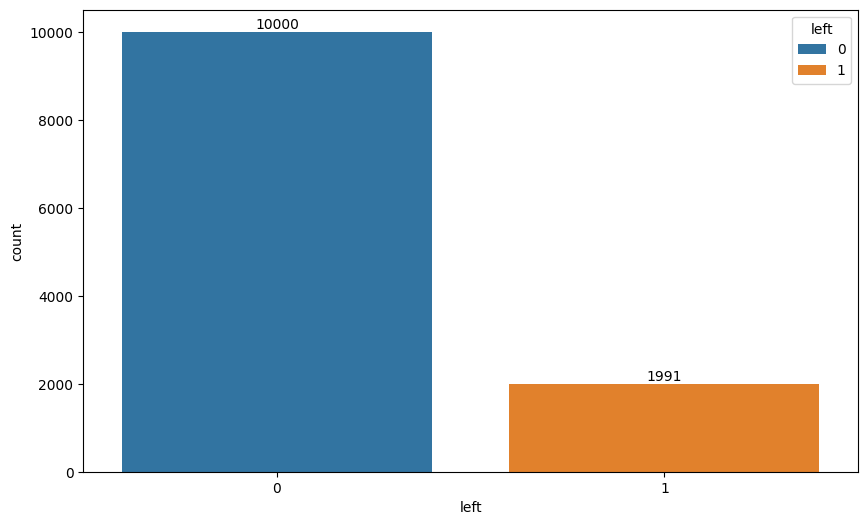

In [23]:
ax=sns.countplot(x=df['left'], hue=df['left'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

In [11]:
df.select_dtypes(include=["number"]).groupby(['left']).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


**'Departments' Column**

In [ ]:
df['departments'].value_counts(dropna=False)

departments
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [ ]:
df.groupby(['departments'])['left'].value_counts(normalize=True)

departments  left
IT           0       0.838115
             1       0.161885
RandD        0       0.877522
             1       0.122478
accounting   0       0.824477
             1       0.175523
hr           0       0.811980
             1       0.188020
management   0       0.880734
             1       0.119266
marketing    0       0.833581
             1       0.166419
product_mng  0       0.839650
             1       0.160350
sales        0       0.830195
             1       0.169805
support      0       0.828666
             1       0.171334
technical    0       0.826203
             1       0.173797
Name: proportion, dtype: float64

In [ ]:
df_dep = pd.DataFrame(pd.crosstab(df['departments'], df['left']))
df_dep.rename(columns = {0 : 'retained', 1 : 'left'}, inplace = True)
df_dep = df_dep.assign(total = lambda x: (x['retained'] + x['left']))
df_dep = df_dep.assign(left_percentage = lambda x: round((x['left'] / x['total'] * 100),2))
df_dep

left,retained,left,total,left_percentage
departments,,,,
IT,818,158,976,16.19
RandD,609,85,694,12.25
accounting,512,109,621,17.55
hr,488,113,601,18.80
management,384,52,436,11.93
marketing,561,112,673,16.64
product_mng,576,110,686,16.03
sales,2689,550,3239,16.98
support,1509,312,1821,17.13


In [12]:
pd.crosstab(df['departments'], df['left']).iplot(kind='bar', title = 'department and left')


In [13]:
px.pie(values=df['departments'].value_counts(),
       names=(df['departments'].value_counts()).index.tolist(),
       title='"departments" Column Distribution')

We see that the departments alone does not have an effect on the left decision.
It is seen that the left percentages of the departments are similar.

**"Salary" Columns**

In [14]:
df['salary'].value_counts(dropna=False)

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [15]:
px.pie(values=df['salary'].value_counts(),
       names=(df['salary'].value_counts()).index.tolist(),
       title='"salary" Column Distribution')

In [ ]:
df_sal = pd.DataFrame(pd.crosstab(df['salary'], df['left']))
df_sal.rename(columns = {0 : 'retained', 1 : 'left'}, inplace = True)
df_sal = df_sal.assign(total = lambda x: (x['retained'] + x['left']))
df_sal = df_sal.assign(left_percentage = lambda x: round((x['left'] / x['total'] * 100),2))
df_sal

left,retained,left,total,left_percentage
salary,,,,
high,942,48,990,4.85
low,4566,1174,5740,20.45
medium,4492,769,5261,14.62


In [16]:
pd.crosstab(df['salary'], df['left']).iplot(kind='bar', title = 'salary and left')

In our dataset, %49 (approximatly half) of the employees are in the low salary category. %43 are in the medium salary category and the rest %8 are in the high salary category. The analysis above showes that nearly %30 of the low salary group leave their jobs. Similarly %20 of the middle salary group leave their jobs. This proves that salary is very important factor for employee retention.

**'satisfaction_level' Column**

In [ ]:
df['satisfaction_level'].value_counts(dropna=False)

satisfaction_level
0.74    214
0.10    203
0.73    201
0.50    200
0.72    199
       ... 
0.25     29
0.26     28
0.12     26
0.28     24
0.27     23
Name: count, Length: 92, dtype: int64

In [ ]:
df['satisfaction_level'].nunique()

92

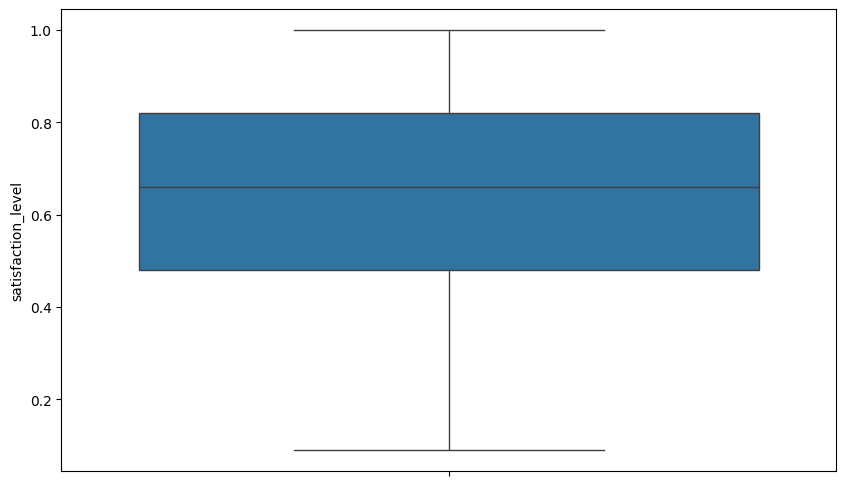

In [ ]:
sns.boxplot(df['satisfaction_level']);

In [17]:
pd.crosstab(df['satisfaction_level'], df['left']).iplot(kind='bar', title = 'satisfaction_level and left')

In [18]:
pd.crosstab(df['satisfaction_level'], df['salary']).iplot(kind='bar', title = 'satisfaction_level and salary')


Normally we expect a positive linear relationship between satisfaction_level and left. However, we see that those with a satisfaction_level around 0.1 have a high turnover rate. In addition, while this rate decreases in the 0.1-0.4 range, it increases in the 0.3-0.5 range. At the same time, those with high satisfaction scores appear to have high turnover rates. This situation could have several reasons:


*   The satisfaction test may be inadequate
*   Employees' expectations may change over time




**'last_evaluation' Column**

In [ ]:
df['last_evaluation'].value_counts(dropna=False)

last_evaluation
0.55    281
0.50    269
0.51    264
0.57    258
0.54    252
       ... 
0.42     45
0.43     44
0.38     42
0.44     35
0.36     19
Name: count, Length: 65, dtype: int64

In [ ]:
df['last_evaluation'].nunique()

65

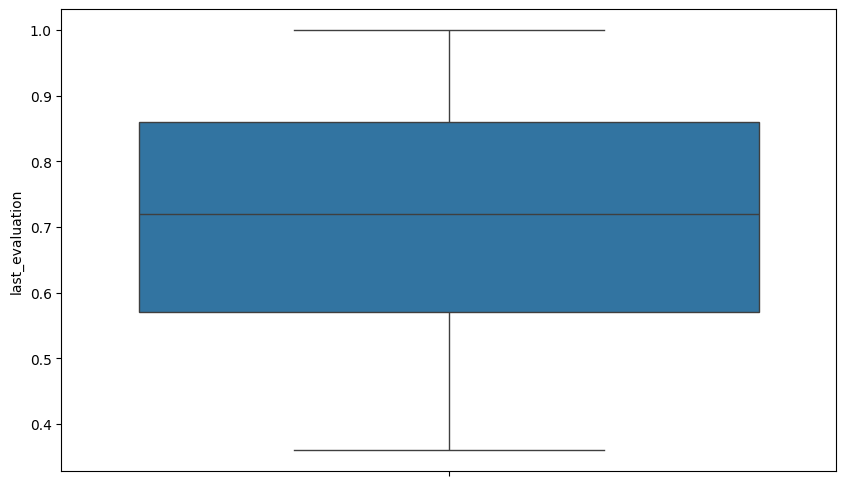

In [ ]:
sns.boxplot(df['last_evaluation']);

In [19]:
pd.crosstab(df['last_evaluation'], df['left']).iplot(kind='bar', title = 'last_evaluation and left')

In [20]:
px.violin(df[['satisfaction_level','last_evaluation', 'left']], color='left', box=True,
            title='satisfaction_level and last_evaluation')

We can better understand the relationship between 'last evaluation' and left by comparing it with 'satisfaction level'. We can identify three different groups:


*  The first group consists of individuals whose 'last_evaluation' values are between 0.4 and 0.6, and their 'satisfaction_level' values show a similar distribution, with high turnover rates.
*  The second group has 'last_evaluation' values between 0.6 and 0.8, and their 'satisfaction_level' values show a parallel change. However, their turnover rates are decreasing.

*  The third group comprises individuals with high values in both 'last_evaluation' and 'satisfaction_level'. In this group, similar to the first group, turnover rates are increasing.

To understand the reasons behind these situations more realistically, we need to consider different parameters. Factors such as low salaries or high workloads should also be evaluated.

**'number_project' Column**

In [ ]:
df['number_project'].value_counts(dropna=False)

number_project
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: count, dtype: int64

In [21]:
px.pie(values=df['number_project'].value_counts(),
       names=(df['number_project'].value_counts()).index.tolist(),
       title='"number_project" Column Distribution')

In [ ]:
df_np = pd.DataFrame(pd.crosstab(df['number_project'], df['left']))
df_np.rename(columns = {0 : 'retained', 1 : 'left'}, inplace = True)
df_np = df_np.assign(total = lambda x: (x['retained'] + x['left']))
df_np = df_np.assign(left_percentage = lambda x: round((x['left'] / x['total'] * 100),2))
df_np

left,retained,left,total,left_percentage
number_project,,,,
2,725,857,1582,54.17
3,3482,38,3520,1.08
4,3448,237,3685,6.43
5,1890,343,2233,15.36
6,455,371,826,44.92
7,0,145,145,100.00


In [22]:
pd.crosstab(df['number_project'], df['left']).iplot(kind='bar', title = 'number_project and left')

In [ ]:
df.loc[df['number_project']==7,['satisfaction_level', 'last_evaluation']].mean()

satisfaction_level    0.116690
last_evaluation       0.863517
dtype: float64

In [ ]:
df.loc[df['number_project']==7,['salary']].value_counts()

salary
low       82
medium    61
high       2
Name: count, dtype: int64

In [ ]:
filtered_df = df[df['number_project'] == 7]
grouped = filtered_df.groupby(['departments', 'salary'])
result = grouped[['satisfaction_level', 'last_evaluation']].mean()
result

satisfaction_level  last_evaluation
departments salary                                     
IT          low               0.100000         0.886000
            medium            0.101429         0.857143
RandD       low               0.105000         0.875000
            medium            0.100000         0.860000
accounting  low               0.102000         0.808000
            medium            0.143333         0.773333
hr          low               0.107500         0.855000
            medium            0.096667         0.830000
management  low               0.096667         0.800000
            medium            0.245000         0.810000
marketing   low               0.104286         0.878571
            medium            0.095000         0.955000
product_mng low               0.096667         0.850000
            medium            0.110000         0.810000
sales       high              0.105000         0.870000
            low               0.109412         0.865882
            medium            0.100625         0.891250
support     low               0.103636         0.912727
            medium            0.115000         0.886250
technical   low               0.118636         0.866364
            medium            0.181818         0.830000

In [ ]:
filtered_df = df[df['number_project'] == 2]
grouped = filtered_df.groupby(['departments', 'salary'])
result = grouped[['satisfaction_level', 'last_evaluation']].mean()
result

satisfaction_level  last_evaluation
departments salary                                     
IT          high              0.600000         0.604286
            low               0.494795         0.602877
            medium            0.492449         0.583878
RandD       high              0.430000         0.535000
            low               0.495814         0.587209
            medium            0.515000         0.595833
accounting  high              0.585000         0.720000
            low               0.460250         0.546250
            medium            0.497742         0.544839
hr          high              0.500000         0.627500
            low               0.433721         0.559302
            medium            0.449024         0.551463
management  high              0.614667         0.672667
            low               0.471053         0.526316
            medium            0.490000         0.604118
marketing   high              0.445714         0.607143
            low               0.485882         0.571569
            medium            0.537368         0.587105
product_mng high              0.576000         0.502000
            low               0.527455         0.631273
            medium            0.474878         0.557073
sales       high              0.581667         0.700556
            low               0.498589         0.576573
            medium            0.497732         0.590825
support     high              0.549167         0.644167
            low               0.501077         0.573462
            medium            0.504353         0.585529
technical   high              0.456000         0.585500
            low               0.493092         0.574737
            medium            0.524909         0.605909

When looking at turnover rates, the highest numbers are in the groups with the least and most number of projects. For those with 7 projects, both 'salary' and 'satisfaction_level' are low, which explains their turnover. For those with 2 projects, their 'last_evaluation' values are not high. They might have been dismissed due to insufficient skills.

**'average_montly_hours' Column**

In [ ]:
df['average_montly_hours'].value_counts(dropna=False)

average_montly_hours
156    112
149    112
160    111
151    107
135    104
      ... 
298      5
302      5
297      5
299      5
303      5
Name: count, Length: 215, dtype: int64

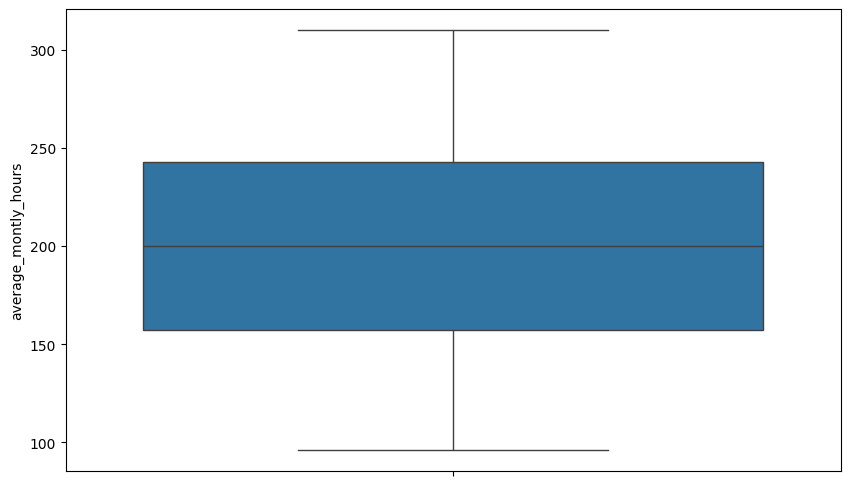

In [ ]:
sns.boxplot(df['average_montly_hours']);

In [23]:
pd.crosstab(df['average_montly_hours'], df['left']).iplot(kind='bar', title = 'average_montly_hours and left')

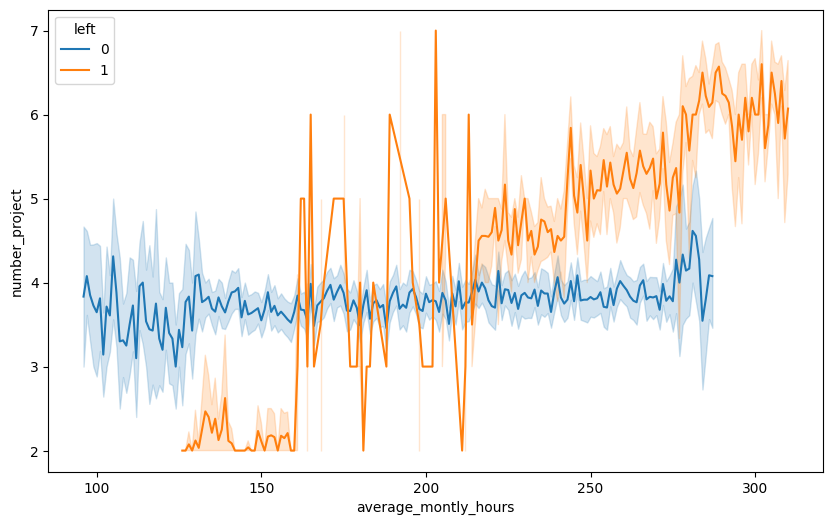

In [ ]:
sns.lineplot(df, x='average_montly_hours', y='number_project', hue='left');

In [ ]:
df.loc[df['average_montly_hours']>=288]['left'].value_counts()

left
1    184
Name: count, dtype: int64

In [24]:
pd.crosstab(df['average_montly_hours'], df['salary']).iplot(kind='bar', title = 'average_montly_hours and salary')


When looking at the 'average_monthly_hours' values, it is observed that the attrition rate increases among those who work 125-160 hours per month and those who work more than 217 hours per month. To understand the reason behind this, it is necessary to examine other parameters as well. For instance, when looking at the relationship between 'number_project' and 'average_monthly_hours', a positive linear effect is observed specifically for those who have left the job.

Additionally, all employees working 280 hours or more per month have left the job. In real life, in the Western world, the standard is 8 hours per day, 160 hours per month. This data contains values that are significantly above these working standards. This raises the question: if this data is from Western countries, it might be incorrect; however, if it is from countries outside the West, it may be accurate.

**'time_spend_company' Column**

In [ ]:
df['time_spend_company'].value_counts(dropna=False)

time_spend_company
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64

In [25]:
pd.crosstab(df['time_spend_company'], df['left']).iplot(kind='bar', title = 'time_spend_company and left')

In [ ]:
df_ts = pd.DataFrame(pd.crosstab(df['time_spend_company'], df['left']))
df_ts.rename(columns = {0 : 'retained', 1 : 'left'}, inplace = True)
df_ts = df_ts.assign(total = lambda x: (x['retained'] + x['left']))
df_ts = df_ts.assign(left_percentage = lambda x: round((x['left'] / x['total'] * 100),2))
df_ts

left,retained,left,total,left_percentage
time_spend_company,,,,
2,2879,31,2910,1.07
3,4316,874,5190,16.84
4,1510,495,2005,24.69
5,580,482,1062,45.39
6,433,109,542,20.11
7,94,0,94,0.00
8,81,0,81,0.00
10,107,0,107,0.00


In [26]:
fig=px.box(df, x='time_spend_company', y='number_project',title = "time_spend_company & number_project")
fig.show()

In [ ]:
fig = px.box(df, x = 'time_spend_company', y = 'average_montly_hours',color='left', title = "'time_spend_company' & 'average_montly_hours'")
fig.show()

When looking at the 'time_spend_company' values, the turnover rate is higher for employees with 3-6 years of experience compared to other working durations. Those with 7 years or more of experience tend to stay with the same company. Additionally, when examining the relationship between 'time_spend_company' and 'average_montly_hours', it is observed that the number of employees leaving the job increases for those working 200 hours or more per month.

**'work_accident' Column**

In [ ]:
df['work_accident'].value_counts(dropna='False')

work_accident
0    10141
1     1850
Name: count, dtype: int64

In [27]:
px.pie(values=df['work_accident'].value_counts(),
       names=(df['work_accident'].value_counts()).index.tolist(),
       title='"work_accident" Column Distribution')

In [ ]:
df_wa= pd.DataFrame(pd.crosstab(df['work_accident'], df['left']))
df_wa.rename(columns = {0 : 'retained', 1 : 'left'}, inplace = True)
df_wa = df_wa.assign(total = lambda x: (x['retained'] + x['left']))
df_wa = df_wa.assign(left_percentage = lambda x: round((x['left'] / x['total'] * 100),2))
df_wa

left,retained,left,total,left_percentage
work_accident,,,,
0,8255,1886,10141,18.60
1,1745,105,1850,5.68


In [ ]:
pd.crosstab(df['work_accident'], df['left']).iplot(kind='bar', title = 'work_accident and left')

In [ ]:
px.histogram(df, x = df['time_spend_company'], color='work_accident', title = 'work_accident and time_spend_company')

The 'work_accident' column has binary values. The rate of employees who left without having an accident is three times higher than those who left after having an accident. This indicates that 'work_accident' does not significantly impact the turnover rate.

**'promotion_last_5years' Column**

In [ ]:
df['promotion_last_5years'].value_counts(dropna='False')

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

In [28]:
px.pie(values=df['promotion_last_5years'].value_counts(),
       names=(df['promotion_last_5years'].value_counts()).index.tolist(),
       title='"promotion_last_5years" Column Distribution')

In [ ]:
df_pro= pd.DataFrame(pd.crosstab(df['promotion_last_5years'], df['left']))
df_pro.rename(columns = {0 : 'retained', 1 : 'left'}, inplace = True)
df_pro = df_pro.assign(total = lambda x: (x['retained'] + x['left']))
df_pro = df_pro.assign(left_percentage = lambda x: round((x['left'] / x['total'] * 100),2))
df_pro

left,retained,left,total,left_percentage
promotion_last_5years,,,,
0,9805,1983,11788,16.82
1,195,8,203,3.94


In [ ]:
pd.crosstab(df['promotion_last_5years'], df['left']).iplot(kind='bar', title = 'promotion_last_5years')

In [ ]:
px.histogram(df, x = df['time_spend_company'], color='promotion_last_5years', title = 'promotion_last_5years and time_spend_company')


'promotion_last_5years' column has binary type values.

 We can not say anything for sure by just observing the promotion parameter.

## 2. Data Visualization

The pairplot visualization of the numerical columns


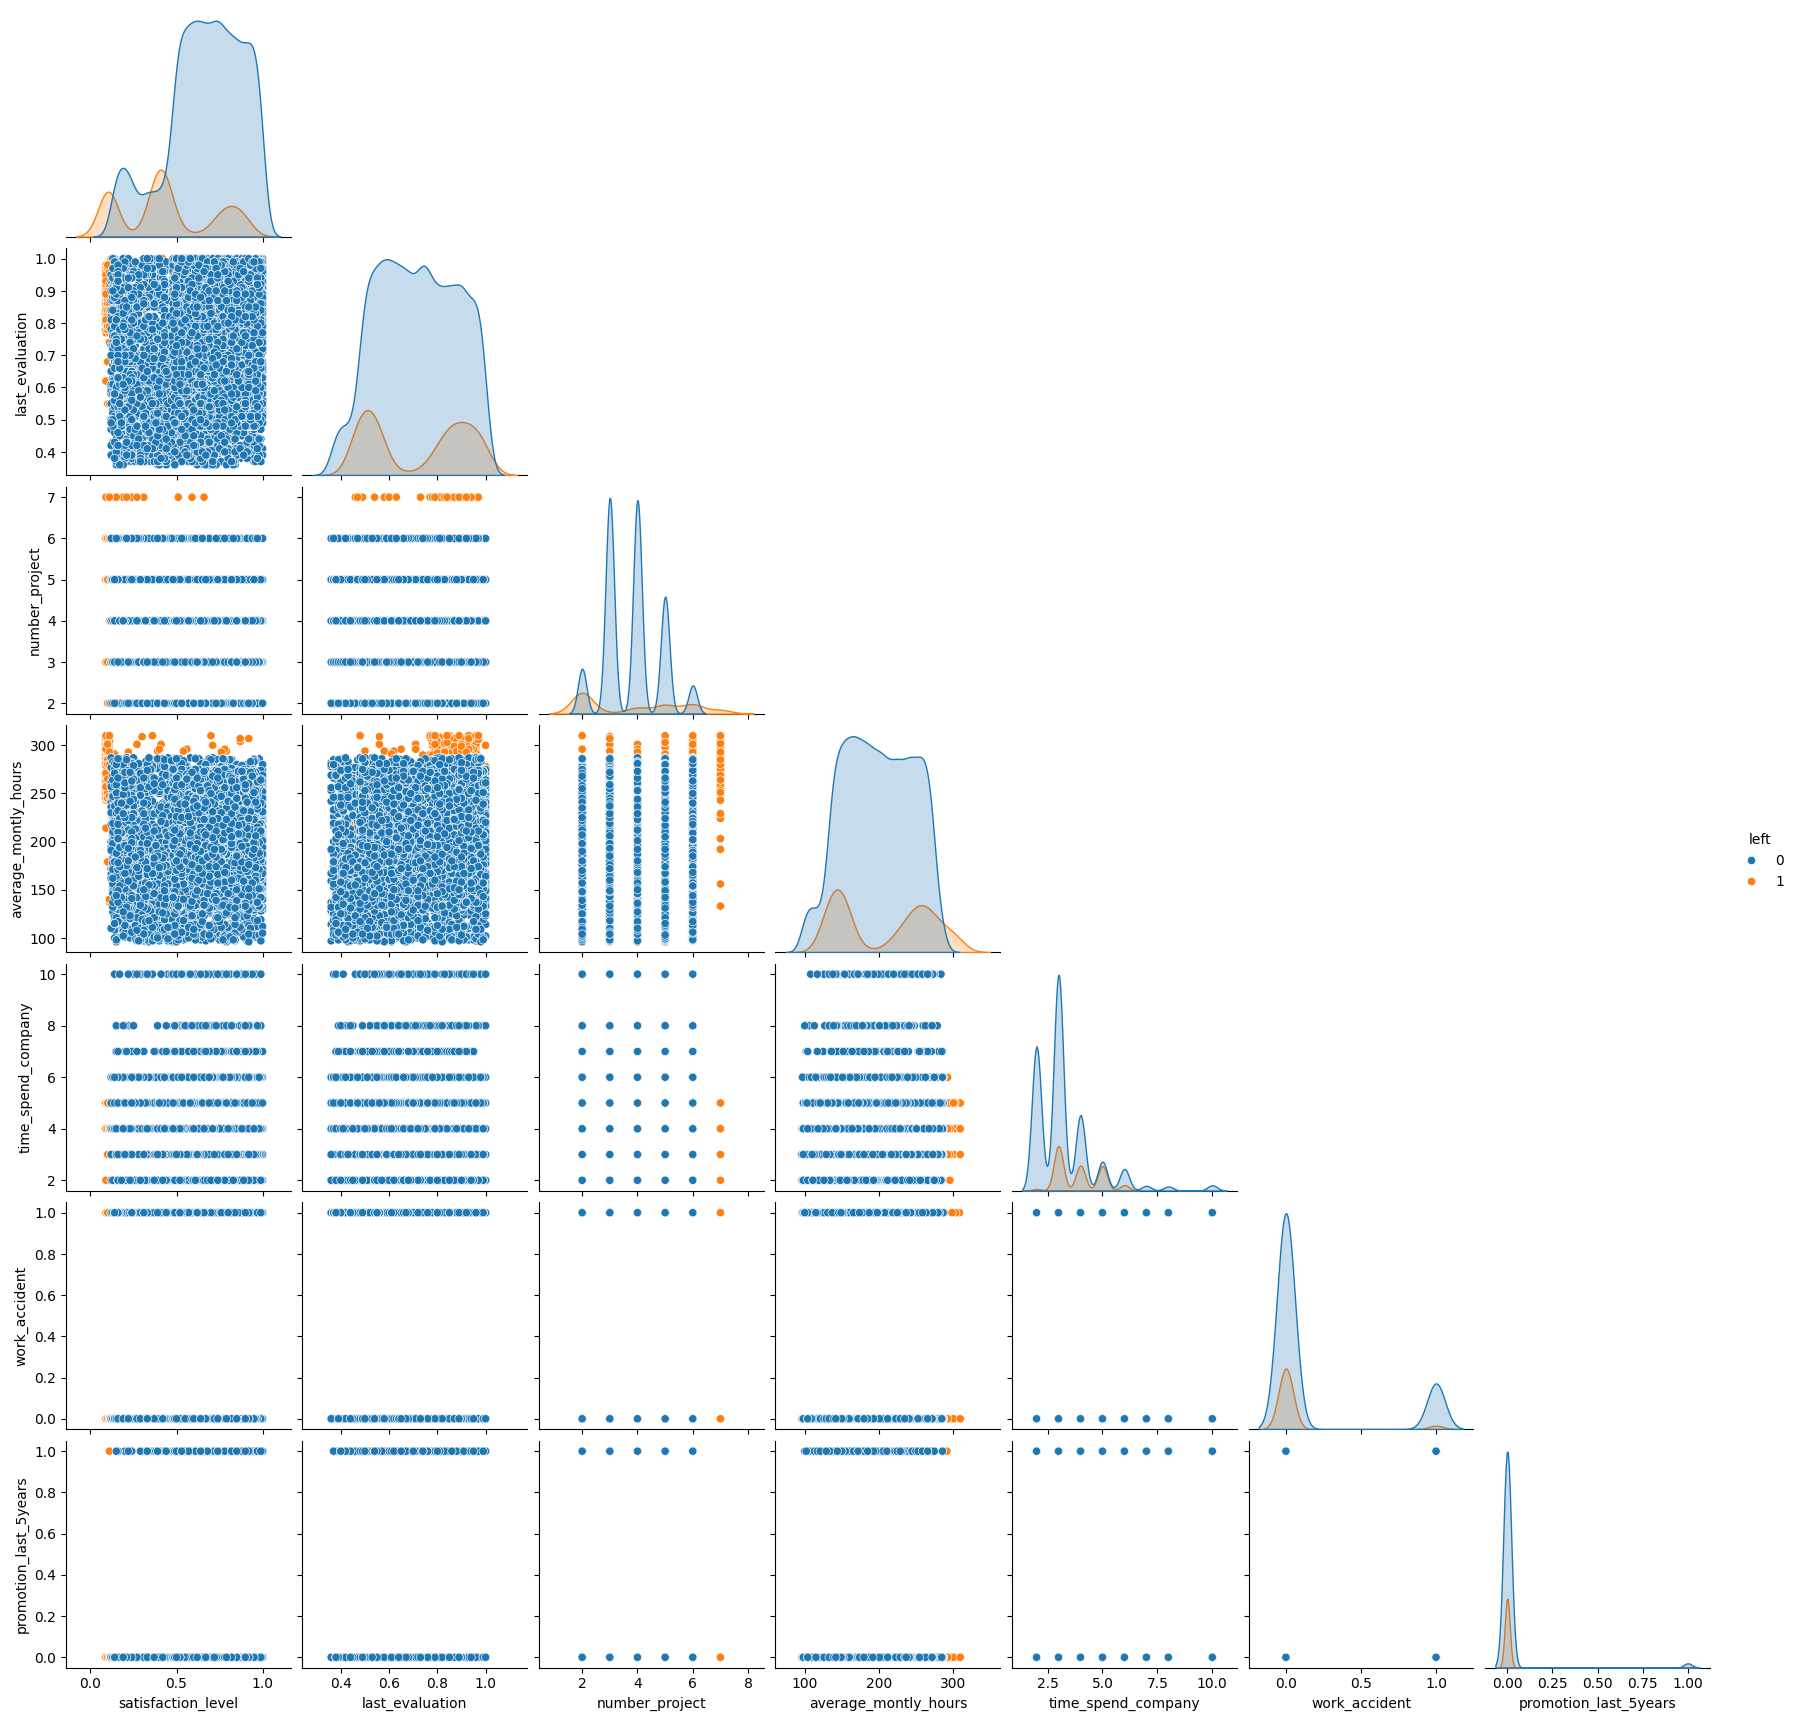

In [ ]:
print("The pairplot visualization of the numerical columns")
sns.pairplot(df, hue = "left", corner = True);

Heatmap of the numerical columns


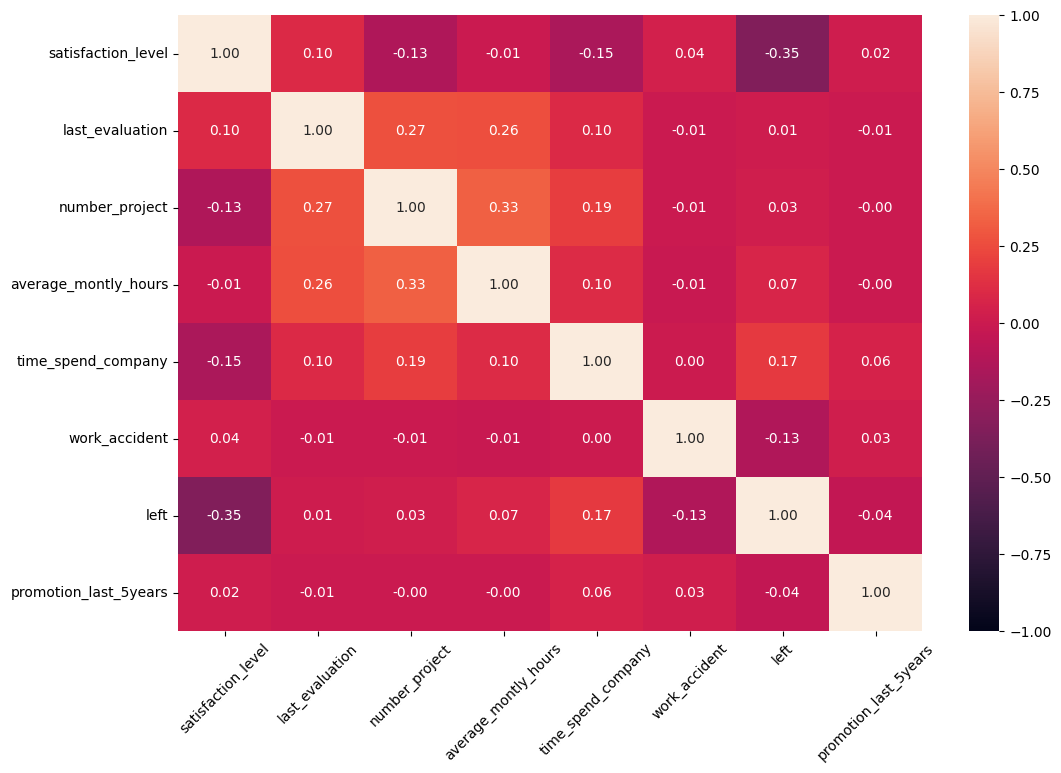

In [ ]:
print("Heatmap of the numerical columns")

plt.figure(figsize = (12, 8))
sns.heatmap (df.corr(numeric_only=True), annot = True, fmt = '.2f', vmin = -1, vmax = 1)
plt.xticks(rotation = 45);

In [ ]:
df.corr(numeric_only=True)['left'].sort_values().drop('left').iplot(kind = 'barh');



* No multicollinearity problem is detected.
* There are weak correlations between the features.
* There is a weak correlation between the numerical features and the target column.
*   There is a weak negative correlation between the target variable and the variables "promotion_last_5years," "work_accident," and "satisfaction_level."
*   There is a weak positive the target variable and the variables  "time_spend_company," "average_monthly_hours," "number_project," and "last_evaluation."
*  "satisfaction_level" has a bigger influence on the decision to leave the work compared to the other columns.






## 3. Cluster Analysis

# 3.1 Label Encoding

In [24]:
df1=df.drop('left', axis = 1)
df1.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,0,sales,low


In [25]:
df1 = pd.get_dummies(df1, columns = ['departments','salary'], drop_first = True)
df1.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments_RandD,departments_accounting,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,False,False,False,False,False,False,True,False,False,True,False


Weil doing Cluster analysis we are going to use the Kmeans model, so we are dropping 'departments' and 'salary' features.

# 3.2 Scaling

In [26]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments_RandD,departments_accounting,departments_hr,departments_management,departments_marketing,departments_product_mng,departments_sales,departments_support,departments_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,0,False,False,False,False,False,False,True,False,False,True,False


In [27]:
scaler = MinMaxScaler()
scaler.fit(df1)
df1_scaled= scaler.transform(df1)

In [28]:
df1_scaled

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.83516484, 0.28125   , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.26373626, 0.453125  , 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.45054945, 0.578125  , 0.4       , ..., 0.        , 1.        ,
        0.        ]])

In [31]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform


def hopkins(X, ratio=0.05):
    """
    Compute the Hopkins statistic for the given dataframe X.
    Hopkins statistic is a measure of the randomness of a data set.
    It is calculated as the ratio of the sum of the distances to the nearest neighbors
    of the uniform random sample to the sum of the distances to the nearest neighbors of
    the original data sample.
    The value of the Hopkins statistic is between 0 and 1, with a value of 0 indicating
    that the data is not random and a value of 1 indicating that the data is completely random.
    The Hopkins statistic is a good measure of the randomness of a data set,
    as it can be used to determine if a data set is random or not.

    Parameters:
    X (pandas.DataFrame): Input dataframe
    ratio (float, optional): Ratio of the uniform random sample to the original data sample. Defaults to 0.05.

    Returns:
    float: Hopkins statistic
    """

    if not isinstance(X, np.ndarray):
        X = X.values  # convert dataframe to a numpy array
    sample_size = int(
        X.shape[0] * ratio
    )  # 0.05 (5%) based on paper by Lawson and Jures

    # a uniform random sample in the original data space
    X_uniform_random_sample = uniform(
        X.min(axis=0), X.max(axis=0), (sample_size, X.shape[1])
    )

    # a random sample of size sample_size from the original data X
    random_indices = sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    # initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(X)

    # u_distances = nearest neighbour distances from uniform random sample
    u_distances, u_indices = nbrs.kneighbors(X_uniform_random_sample, n_neighbors=2)
    u_distances = u_distances[:, 0]  # distance to the first (nearest) neighbour

    # w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances, w_indices = nbrs.kneighbors(X_sample, n_neighbors=2)
    # distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[:, 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    # compute and return hopkins' statistic
    H = u_sum / (u_sum + w_sum)
    return H

In [32]:
result = []
for _ in range(10):
    result.append(hopkins(df1_scaled, 0.05))

np.mean(result)

0.9163147978708999

In [ ]:
def elbow_vis(X, k_range=range(1, 10), inertia=True):
    """
    This is a function that visualizes the elbow method for determining the optimal number of clusters in a dataset.

    Args:
        X (pd.Dataframe): Input data
        k_range (range, optional): generator for k values. Defaults to range(2, 11).
        inertia (bool, optional): to select either inertia or distorion. Defaults to True.
    Returns:
        None.
    """
    if inertia:
        inertias = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X)
            inertias.append(kmeanModel.inertia_)
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, inertias, "bo--")
        plt.xlabel("k")
        plt.ylabel("Inertia")
        plt.title("The Elbow Method showing the optimal k")
        plt.show()
    else:
        distortion = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42, n_init='auto')
            kmeanModel.fit(X)
            distances = kmeanModel.transform(
                X
            )  # distances from each observation to each cluster centroid
            labels = kmeanModel.labels_
            result = []
            for i in range(k):
                cluster_distances = distances[
                    labels == i, i
                ]  # distances from observations in each cluster to their own centroid
                result.append(
                    np.mean(cluster_distances**2)
                )  # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
            distortion.append(
                sum(result)
            )  # sum the means of all clusters and add it to the distortion list

        plt.figure(figsize=(10, 6))
        plt.plot(k_range, distortion, "r*--", markersize=14.0)
        plt.xlabel("Different k values")
        plt.ylabel("Distortion")
        plt.title("elbow method")

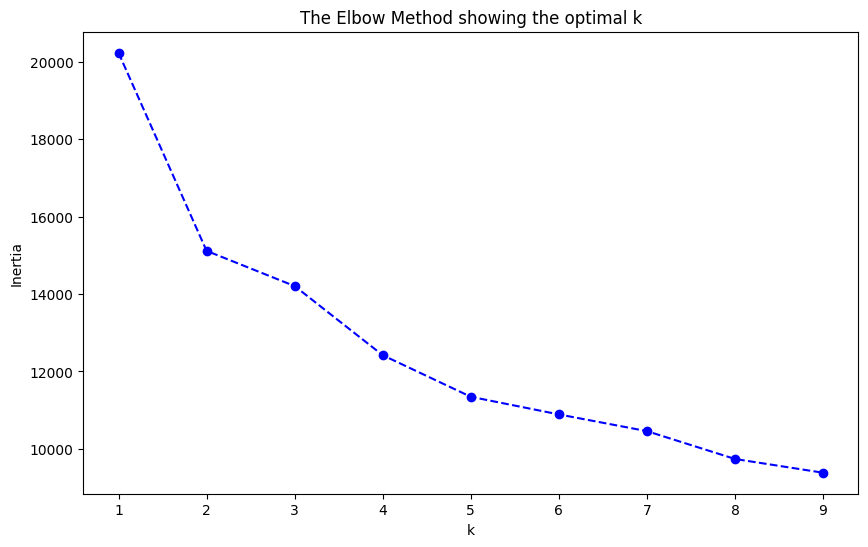

In [ ]:
elbow_vis(df1_scaled)

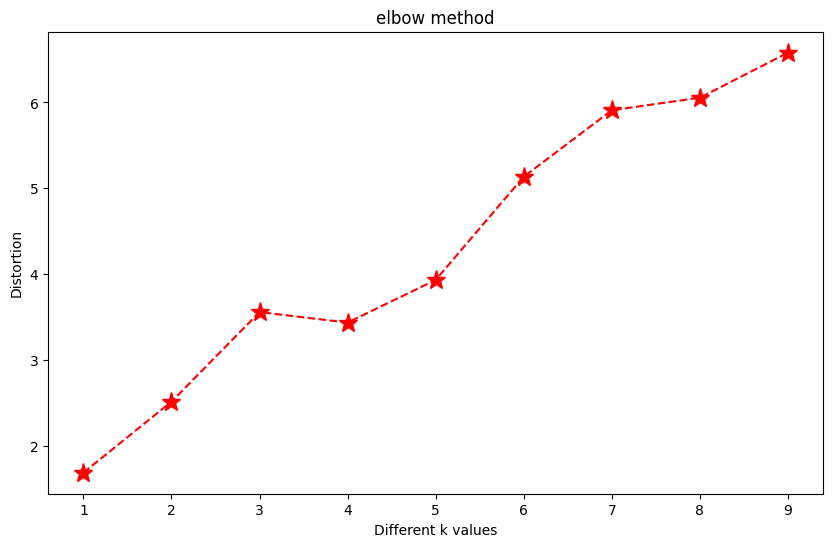

In [ ]:
elbow_vis(df1_scaled, inertia=False)

In [ ]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k,random_state=42, n_init='auto' )
    model.fit(df1_scaled)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df1_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.24293849820807237
Silhouette Score for 3 clusters: 0.18993420061811286
Silhouette Score for 4 clusters: 0.17900983631836617
Silhouette Score for 5 clusters: 0.21836124261590337
Silhouette Score for 6 clusters: 0.22815380720381273
Silhouette Score for 7 clusters: 0.22521739314390235
Silhouette Score for 8 clusters: 0.26545498403779705
Silhouette Score for 9 clusters: 0.27824664808597105


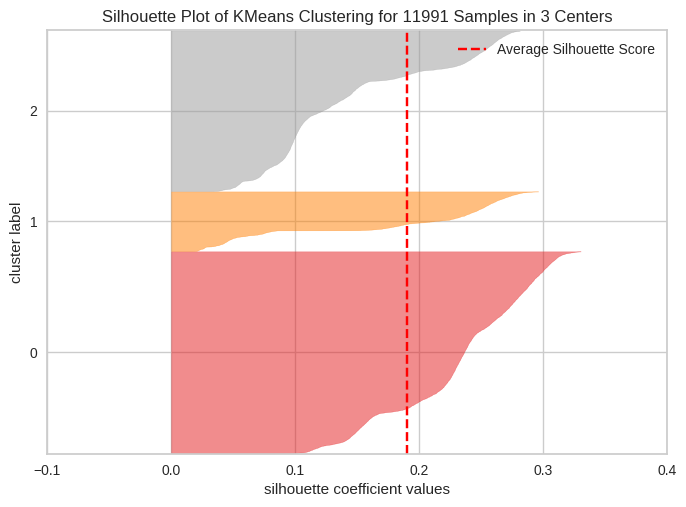

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42, n_init='auto')
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(df1_scaled)  # Fit the data to the visualizer
visualizer.poof();

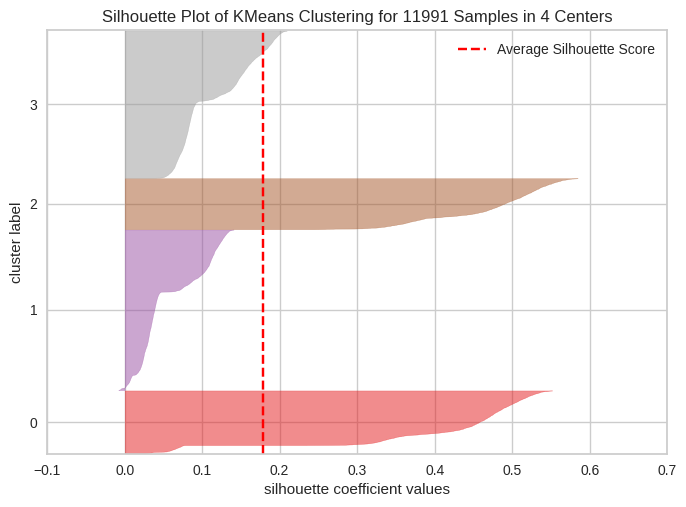

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model_4 = KMeans(n_clusters = 4, random_state = 42, n_init='auto' )
visualizer = SilhouetteVisualizer(model_4)
visualizer.fit(df1_scaled)
visualizer.poof();

In the clusters created using the K-Means model, we evaluated the inertia, distortion, and silhouette values and determined that 2 or 3 clusters is appropriate.

Let's see How it is when K=2

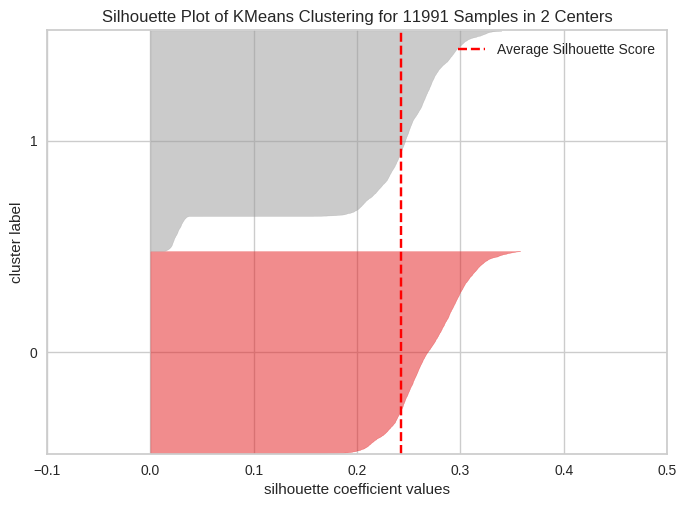

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model_2 = KMeans(n_clusters = 2, random_state = 42, n_init='auto' )
visualizer = SilhouetteVisualizer(model_2)
visualizer.fit(df1_scaled)
visualizer.poof();

In [ ]:
model_2 = KMeans(n_clusters = 2, random_state = 42, n_init='auto' )
model_2.fit_predict(df1_scaled)
labels=model_2.labels_
labels

array([0, 1, 1, ..., 1, 1, 0], dtype=int32)

In [ ]:
df['kmeans_clusters']=labels
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary,kmeans_clusters
0,0.38,0.53,2,157,3,0,1,0,sales,low,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0


In [ ]:
df['kmeans_clusters'].value_counts()

kmeans_clusters
1    6251
0    5740
Name: count, dtype: int64

In [ ]:
df['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [ ]:
df.groupby(df['left'])['kmeans_clusters'].value_counts()

left  kmeans_clusters
0     1                  5434
      0                  4566
1     0                  1174
      1                   817
Name: count, dtype: int64

In [ ]:
pd.crosstab(df['kmeans_clusters'], df['left']).iplot(kind='bar', title = 'kmeans_clusters and left')


data setimize clustering yaklasiminin uygun olmadigini gözlemledik.

## 4. Predictive Model Building

### Preprocessing

In [33]:
df.shape

(11991, 10)

In [34]:
df.shape[0]*(3/10)

3597.2999999999997

In [35]:
X = df.drop('left',axis=1)
y = df['left']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=101)

### Classification Algorithms
 - Try at least 4 ML/DL algorithms.

# **Logistic Regression**

In [37]:
cat = X_train.select_dtypes("object").columns
cat

Index(['departments', 'salary'], dtype='object')

In [38]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [107]:
from sklearn.linear_model import LogisticRegression

operations = [("OrdinalEncoder", column_trans), ("scaler", StandardScaler()), ("logistic", LogisticRegression(class_weight='balanced',random_state=101))]


log_model = Pipeline(steps=operations)

log_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Departments ', 'salary'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(class_weight='balanced',
                                    random_state=101))])

In [39]:
from sklearn.metrics import confusion_matrix, classification_report,\
                            accuracy_score, recall_score, precision_score,\
                            f1_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [109]:
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
[[2304  697]
 [ 105  492]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      3001
           1       0.41      0.82      0.55       597

    accuracy                           0.78      3598
   macro avg       0.69      0.80      0.70      3598
weighted avg       0.87      0.78      0.80      3598


Train_Set
[[5318 1681]
 [ 243 1151]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      6999
           1       0.41      0.83      0.54      1394

    accuracy                           0.77      8393
   macro avg       0.68      0.79      0.70      8393
weighted avg       0.86      0.77      0.80      8393



##Cross validate

In [110]:
from sklearn.model_selection import cross_validate

In [111]:
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.768974
train_accuracy     0.770761
test_precision     0.404230
train_precision    0.406401
test_recall        0.824281
train_recall       0.825441
test_f1            0.542415
train_f1           0.544647
dtype: float64

In [37]:
!pip install scikit_plot

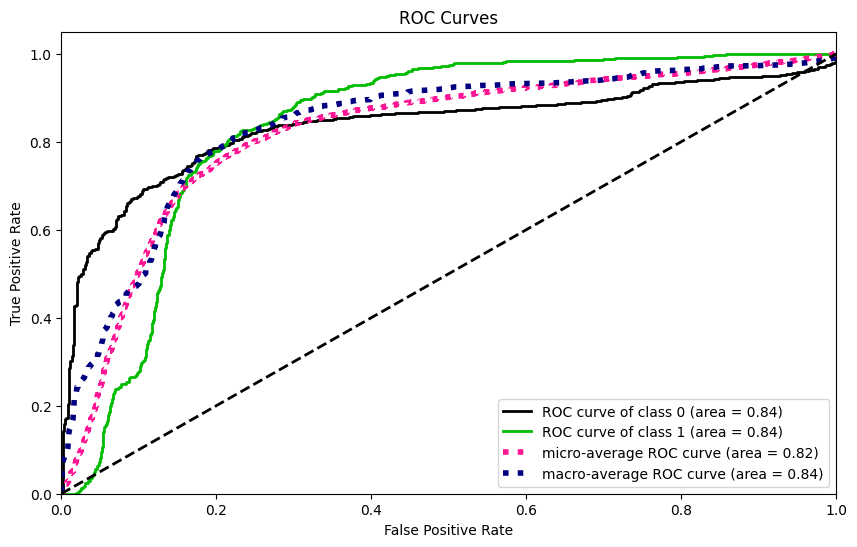

In [ ]:

from scikitplot.metrics import plot_roc
y_pred_proba = log_model.predict_proba(X_test)

plot_roc(y_test, y_pred_proba)
plt.show();

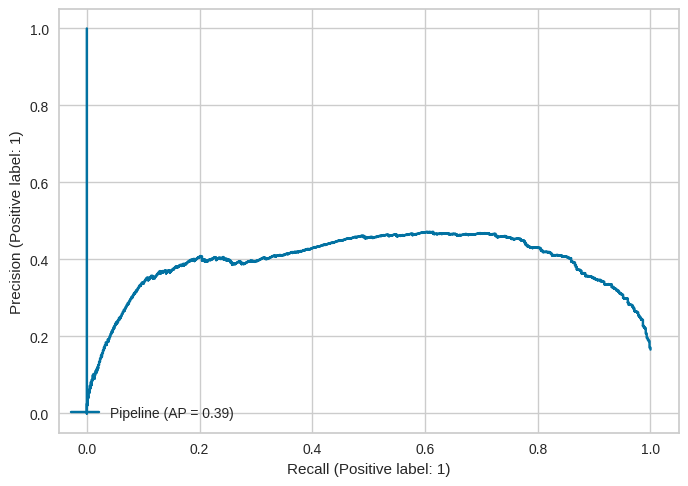

In [ ]:
PrecisionRecallDisplay.from_estimator(log_model, X_test, y_test);

In [112]:
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)
y_train_pred_proba = log_model.predict_proba(X_train)

log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_AP=average_precision_score(y_train, y_train_pred_proba[:,1])

## Logistic Model GridsearchCV

In [113]:

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5]
class_weight= ["balanced", None]
solver = ["liblinear", "saga"]

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}

log_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",

                          n_jobs = -1,
                          return_train_score=True)

In [114]:
log_grid_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Departments ', 'salary'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.01, 0.1, 1, 5],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='recall')

In [115]:
log_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Departments ', 'salary'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    random_state=101, solver='liblinear'))])

In [116]:
eval_metric(log_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[2284  717]
 [ 103  494]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      3001
           1       0.41      0.83      0.55       597

    accuracy                           0.77      3598
   macro avg       0.68      0.79      0.70      3598
weighted avg       0.87      0.77      0.80      3598


Train_Set
[[5265 1734]
 [ 242 1152]]
              precision    recall  f1-score   support

           0       0.96      0.75      0.84      6999
           1       0.40      0.83      0.54      1394

    accuracy                           0.76      8393
   macro avg       0.68      0.79      0.69      8393
weighted avg       0.86      0.76      0.79      8393



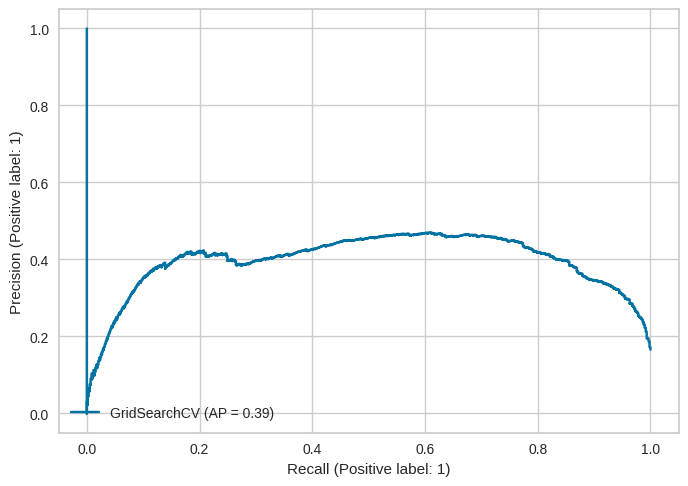

In [ ]:
PrecisionRecallDisplay.from_estimator(log_grid_model, X_test, y_test);

In [117]:
y_pred = log_grid_model.predict(X_test)
y_pred_proba = log_grid_model.predict_proba(X_test)
y_train_pred_proba = log_grid_model.predict_proba(X_train)

log_grid_f1 = f1_score(y_test, y_pred)
log_grid_recall = recall_score(y_test, y_pred)
log_grid_AP=average_precision_score(y_train, y_train_pred_proba[:,1])

#**KNN Model**

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
operations = [("OrdinalEncoder", column_trans), ("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]

knn_model = Pipeline(steps=operations)
knn_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Departments ', 'salary'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [120]:
eval_metric(knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[2926   75]
 [  60  537]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3001
           1       0.88      0.90      0.89       597

    accuracy                           0.96      3598
   macro avg       0.93      0.94      0.93      3598
weighted avg       0.96      0.96      0.96      3598


Train_Set
[[6871  128]
 [ 127 1267]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6999
           1       0.91      0.91      0.91      1394

    accuracy                           0.97      8393
   macro avg       0.95      0.95      0.95      8393
weighted avg       0.97      0.97      0.97      8393



In [121]:
test_error_rates = []


for k in range(1,30):

    operations = [("OrdinalEncoder", column_trans), ("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_model = Pipeline(steps=operations)

    scores = cross_validate(knn_model, X_train, y_train, scoring = ['recall'], cv = 10)

    recall_mean = scores["test_recall"].mean()

    test_error = 1 - recall_mean

    test_error_rates.append(test_error)

In [ ]:
pd.Series(test_error_rates).sort_values().min()


0.09687050359712246

In [ ]:
pd.Series(test_error_rates).sort_values().max()


0.13849948612538543

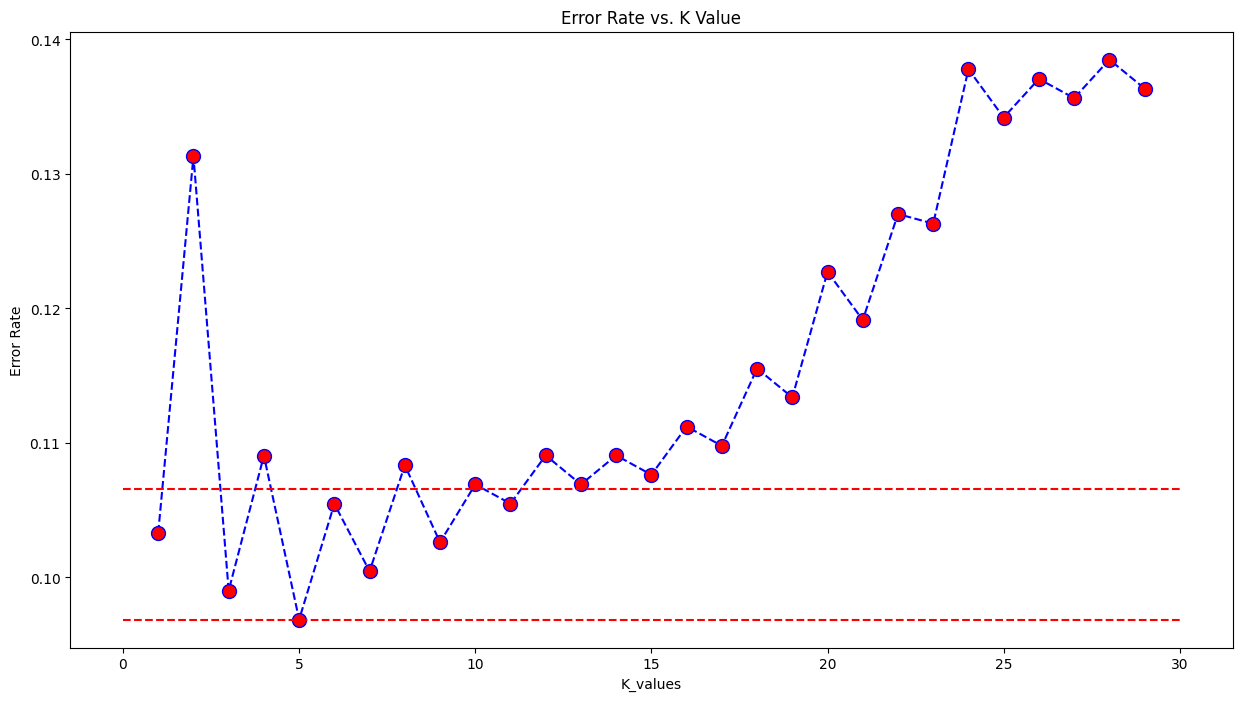

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=pd.Series(test_error_rates).sort_values().min(), xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=(pd.Series(test_error_rates).sort_values().min()) + ((pd.Series(test_error_rates).sort_values().min())*0.1) , xmin = 0, xmax = 30, colors= 'r', linestyles="--");
# We visualize the error scores we find.



In [ ]:
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    operations = [("OrdinalEncoder", column_trans), ("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]
    knn_pipe_model = Pipeline(steps=operations)
    knn_pipe_model.fit(X_train,y_train)
    #scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10, return_train_score=True)
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['recall'], cv = 10, return_train_score=True)
    recall_score_mean = scores["test_recall"].mean()
    recall_test_mean = scores["test_recall"].mean()
    recall_train_mean = scores["train_recall"].mean()
    test_error = 1 - recall_test_mean
    train_error = 1 - recall_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

In [ ]:
test_error_rates_min = pd.Series(test_error_rates).sort_values().min()
test_error_rates_min+(test_error_rates_min*(0.01))

0.09783920863309369

In [ ]:
test_error_rates_max = pd.Series(test_error_rates).sort_values().max()
test_error_rates_max

0.13849948612538543

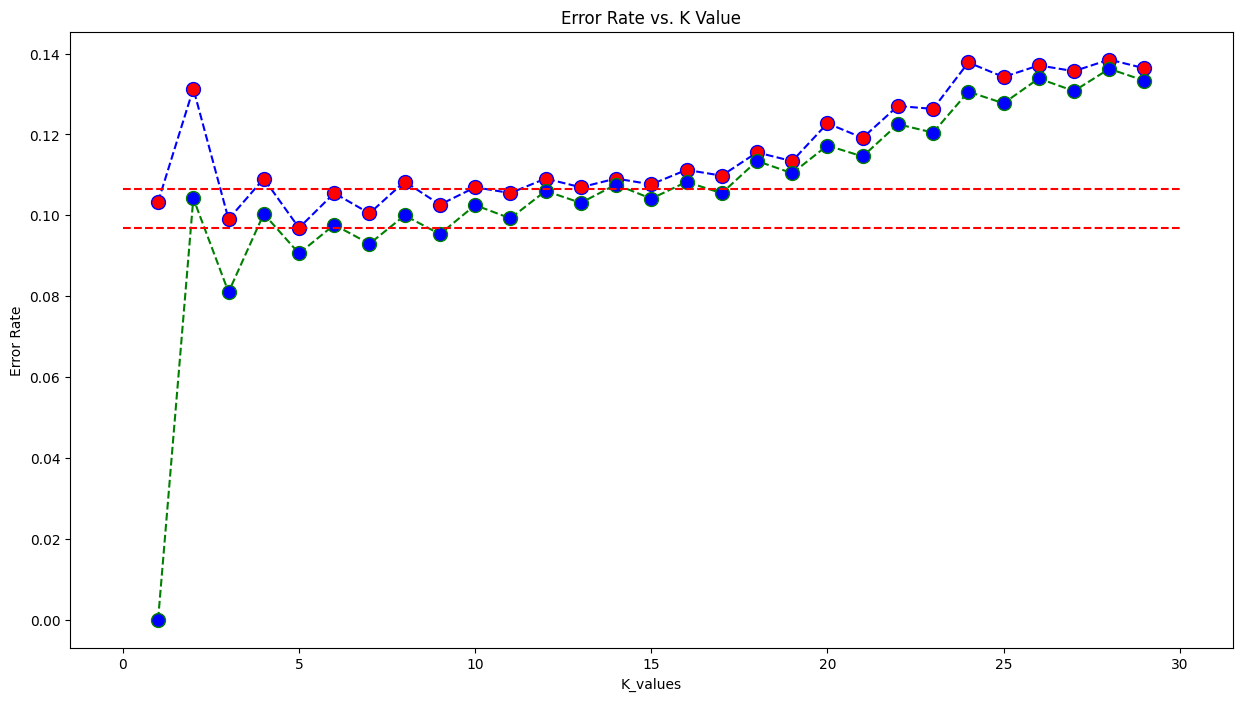

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=test_error_rates_min, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=test_error_rates_min + (test_error_rates_min*(0.1)) , xmin = 0, xmax = 30, colors= 'r', linestyles="--"); # min + %10

In [ ]:
operations = [("OrdinalEncoder", column_trans), ("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=4))]
knn4 = Pipeline(steps=operations)
knn4.fit(X_train, y_train)
print('WITH K=4\n')
eval_metric(knn4, X_train, y_train, X_test, y_test)

WITH K=4

Test_Set
[[2941   60]
 [  68  529]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3001
           1       0.90      0.89      0.89       597

    accuracy                           0.96      3598
   macro avg       0.94      0.93      0.94      3598
weighted avg       0.96      0.96      0.96      3598


Train_Set
[[6934   65]
 [ 140 1254]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6999
           1       0.95      0.90      0.92      1394

    accuracy                           0.98      8393
   macro avg       0.97      0.95      0.95      8393
weighted avg       0.98      0.98      0.98      8393



In [122]:
operations = [("OrdinalEncoder", column_trans), ("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]
knn5 = Pipeline(steps=operations)
knn5.fit(X_train, y_train)
print('WITH K=5\n')
eval_metric(knn5, X_train, y_train, X_test, y_test)

WITH K=5

Test_Set
[[2926   75]
 [  60  537]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3001
           1       0.88      0.90      0.89       597

    accuracy                           0.96      3598
   macro avg       0.93      0.94      0.93      3598
weighted avg       0.96      0.96      0.96      3598


Train_Set
[[6871  128]
 [ 127 1267]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6999
           1       0.91      0.91      0.91      1394

    accuracy                           0.97      8393
   macro avg       0.95      0.95      0.95      8393
weighted avg       0.97      0.97      0.97      8393



## Cross Validate For Optimal K Value

In [ ]:
operations = [("OrdinalEncoder", column_trans), ("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]
model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy',
                                 'precision',
                                 'recall',
                                 'f1'],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.963541
train_accuracy     0.969671
test_precision     0.881462
train_precision    0.908085
test_recall        0.903129
train_recall       0.909453
test_f1            0.891857
train_f1           0.908767
dtype: float64

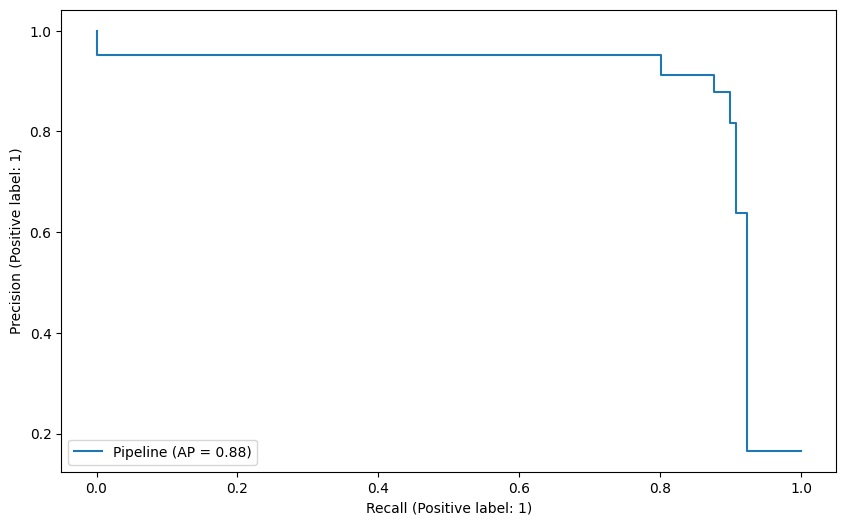

In [ ]:
PrecisionRecallDisplay.from_estimator(knn5, X_test, y_test);

In [123]:
y_pred = knn5.predict(X_test)
y_pred_proba = knn5.predict_proba(X_test)
y_train_pred_proba =knn5.predict_proba(X_train)

knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_AP=average_precision_score(y_train, y_train_pred_proba[:,1])

## Gridsearch Method for Choosing Reasonable K Values

In [124]:
operations = [("OrdinalEncoder", column_trans),("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]
knn_model = Pipeline(steps=operations)

k_values= range(1,20)

param_grid = {"knn__n_neighbors":k_values, "knn__p": [1,2], "knn__weights": ['uniform', "distance"]}

knn_grid_model = GridSearchCV(knn_model, param_grid, cv=10, return_train_score=True)


In [ ]:
knn_grid_model.fit(X_train, y_train)

In [126]:
knn_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Departments ', 'salary'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=2))])

In [127]:
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[2960   41]
 [  76  521]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3001
           1       0.93      0.87      0.90       597

    accuracy                           0.97      3598
   macro avg       0.95      0.93      0.94      3598
weighted avg       0.97      0.97      0.97      3598


Train_Set
[[6999    0]
 [ 144 1250]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6999
           1       1.00      0.90      0.95      1394

    accuracy                           0.98      8393
   macro avg       0.99      0.95      0.97      8393
weighted avg       0.98      0.98      0.98      8393



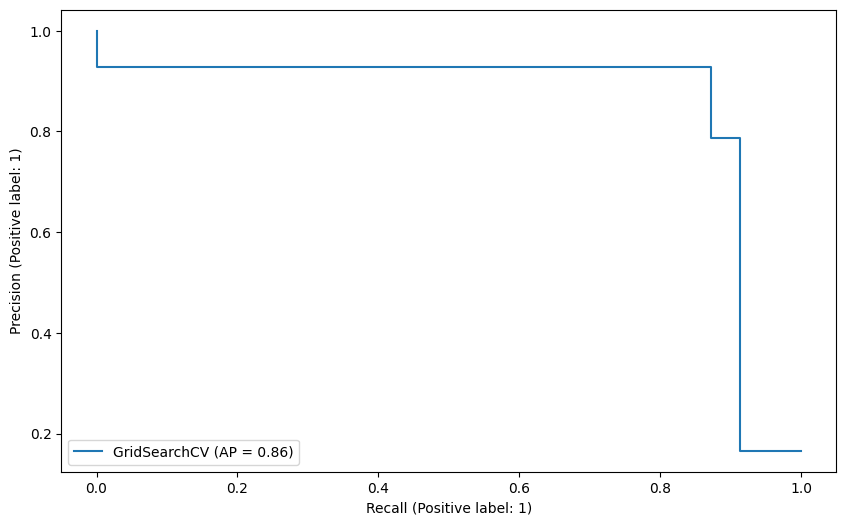

In [128]:
PrecisionRecallDisplay.from_estimator(knn_grid_model, X_test, y_test);

In [129]:
y_pred = knn_grid_model.predict(X_test)
y_pred_proba = knn_grid_model.predict_proba(X_test)
y_train_pred_proba =knn_grid_model.predict_proba(X_train)

knn_grid_f1 = f1_score(y_test, y_pred)
knn_grid_recall = recall_score(y_test, y_pred)
knn_grid_AP=average_precision_score(y_train, y_train_pred_proba[:,1])

#**Random Forest Model**

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
operations= [("OrdinalEncoder", column_trans),("scaler", StandardScaler()),
                 ("RF", RandomForestClassifier(class_weight="balanced",
                                                     random_state=101))]
rf_model = Pipeline(steps=operations)
rf_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Departments ', 'salary'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('RF',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

In [132]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[2996    5]
 [  53  544]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3001
           1       0.99      0.91      0.95       597

    accuracy                           0.98      3598
   macro avg       0.99      0.95      0.97      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6999    0]
 [   0 1394]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6999
           1       1.00      1.00      1.00      1394

    accuracy                           1.00      8393
   macro avg       1.00      1.00      1.00      8393
weighted avg       1.00      1.00      1.00      8393



In [133]:
model = Pipeline(steps=operations)
scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.983438
train_accuracy     1.000000
test_precision     0.990692
train_precision    1.000000
test_recall        0.908854
train_recall       1.000000
test_f1            0.947844
train_f1           1.000000
dtype: float64

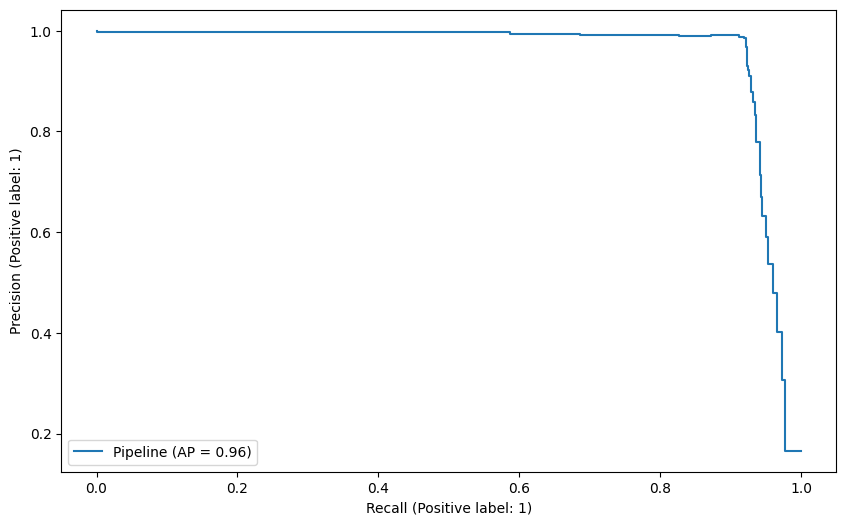

In [134]:
PrecisionRecallDisplay.from_estimator(rf_model, X_test, y_test);

In [135]:
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)
y_train_pred_proba = rf_model.predict_proba(X_train)
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_AP=average_precision_score(y_train, y_train_pred_proba[:,1])

## Random Forest Model GridsearchCV


In [136]:
#operations= [("OrdinalEncoder", column_trans),
             # ("RF", RandomForestClassifier(class_weight="balanced",
                                                     #random_state=101))]
model = Pipeline(steps=operations)
param_grid = {'RF__n_estimators':[400,500],
             'RF__max_depth':[2,3]}
rf_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",
                          n_jobs = -1,
                          return_train_score=True)

In [137]:
rf_grid_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Departments ', 'salary'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('RF',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF__max_depth': [2, 3],
                         'RF__n_estimators': [400, 500]},
             return_train_score=True, scoring='recall')

In [138]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Departments ', 'salary'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('RF',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        n_estimators=500, random_state=101))])

In [139]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[2839  162]
 [  47  550]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      3001
           1       0.77      0.92      0.84       597

    accuracy                           0.94      3598
   macro avg       0.88      0.93      0.90      3598
weighted avg       0.95      0.94      0.94      3598


Train_Set
[[6664  335]
 [  94 1300]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      6999
           1       0.80      0.93      0.86      1394

    accuracy                           0.95      8393
   macro avg       0.89      0.94      0.91      8393
weighted avg       0.95      0.95      0.95      8393



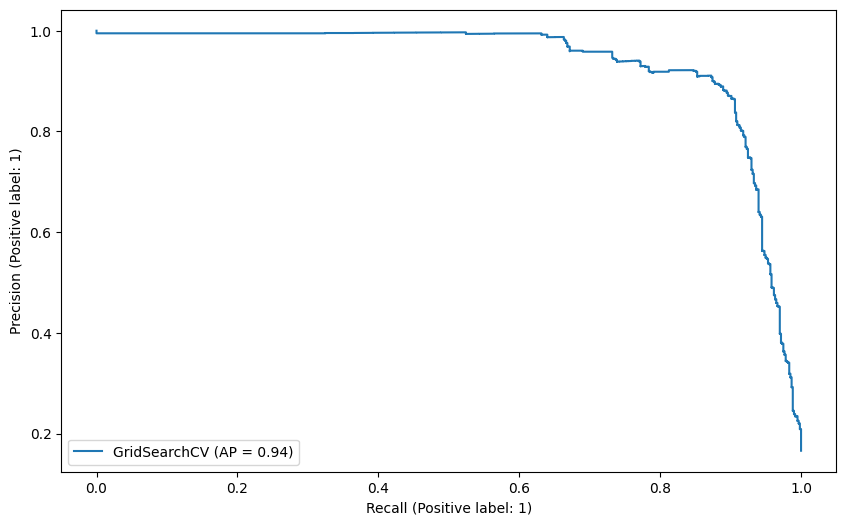

In [140]:
PrecisionRecallDisplay.from_estimator(rf_grid_model, X_test, y_test);

In [141]:
y_pred = rf_grid_model.predict(X_test)
y_pred_proba = rf_grid_model.predict_proba(X_test)
y_train_pred_proba = rf_grid_model.predict_proba(X_train)
rf_grid_f1 = f1_score(y_test, y_pred)
rf_grid_recall = recall_score(y_test, y_pred)
rf_grid_AP=average_precision_score(y_train, y_train_pred_proba[:,1])

#**SVC model**

In [142]:
from sklearn.svm import SVC

In [143]:
operations = [("OrdinalEncoder", column_trans), ("scaler", StandardScaler()),
              ("scv", SVC(probability=True,class_weight="balanced",random_state=101))]

svc_model = Pipeline(steps=operations)

svc_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Departments ', 'salary'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('scv',
                 SVC(class_weight='balanced', probability=True,
                     random_state=101))])

In [144]:
eval_metric(svc_model, X_train, y_train, X_test, y_test)


Test_Set
[[2878  123]
 [  53  544]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3001
           1       0.82      0.91      0.86       597

    accuracy                           0.95      3598
   macro avg       0.90      0.94      0.92      3598
weighted avg       0.95      0.95      0.95      3598


Train_Set
[[6733  266]
 [  93 1301]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      6999
           1       0.83      0.93      0.88      1394

    accuracy                           0.96      8393
   macro avg       0.91      0.95      0.93      8393
weighted avg       0.96      0.96      0.96      8393



##Cross Validate

In [41]:
operations = [("OrdinalEncoder", column_trans),("scaler", StandardScaler()),
              ("svc", SVC(probability=True, class_weight="balanced",random_state=101))]
svc_model = Pipeline(steps=operations)

scores = cross_validate(svc_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.952698
train_accuracy     0.956591
test_precision     0.817408
train_precision    0.826757
test_recall        0.923207
train_recall       0.934481
test_f1            0.866735
train_f1           0.877320
dtype: float64

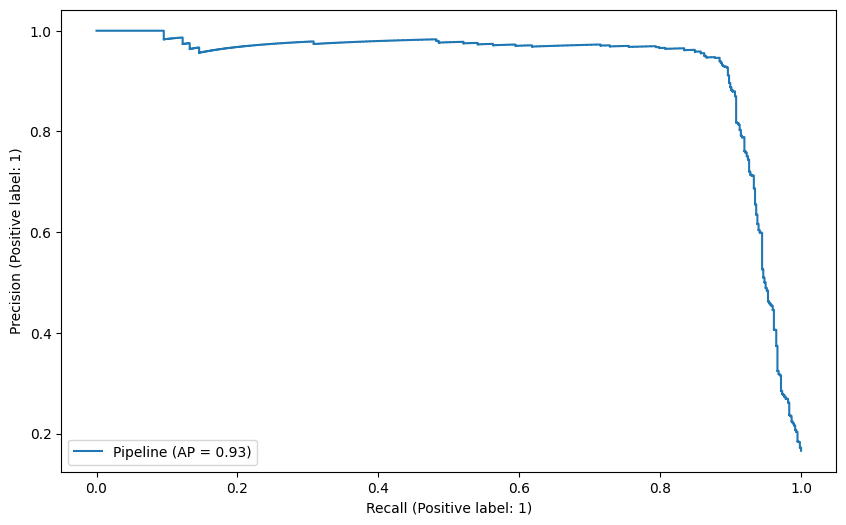

In [145]:
PrecisionRecallDisplay.from_estimator(svc_model, X_test, y_test);

In [146]:
y_pred = svc_model.predict(X_test)
y_pred_proba = svc_model.predict_proba(X_test)
y_train_pred_proba = svc_model.predict_proba(X_train)

svc_f1 = f1_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_AP=average_precision_score(y_train, y_train_pred_proba[:,1])

##SVC Model Optuna

In [46]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.6 MB/s eta 0:00:00


In [14]:
import optuna
from optuna.samplers import TPESampler


def objective(trial):
    svc_C = trial.suggest_loguniform('svc__C', 0.001, 0.1)
    svc_gamma = trial.suggest_loguniform('svc__gamma',  0.1, 0.3)
    svc_kernel = trial.suggest_categorical('svc__kernel', ['rbf', 'linear'])
    svc_class_weight = trial.suggest_categorical('svc__class_weight', ['balanced', None])

    operations = [
        ("OrdinalEncoder", column_trans),
        ("scaler", StandardScaler()),
        ("svc", SVC(C=svc_C, gamma=svc_gamma, kernel=svc_kernel, class_weight=svc_class_weight, random_state=101, probability=True))
    ]

    svc_model = Pipeline(steps=operations)
    scores = cross_val_score(svc_model, X, y, cv=3, scoring='recall', n_jobs=-1)
    return scores.mean()

study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=101),)
study.optimize(objective, n_trials=15,n_jobs=-1)

print("Best hyperparameters: ", study.best_params)
print("Best recall score: ", study.best_value)


[I 2024-05-27 08:44:13,431] A new study created in memory with name: no-name-12dd6dbd-45c9-44d2-9059-def613a117d7
/tmp/ipykernel_27400/1470010192.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_27400/1470010192.py:7: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_27400/1470010192.py:6: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_27400/1470010192.py:7: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See htt

Best hyperparameters:  {'svc__C': 0.09374526047718264, 'svc__gamma': 0.12647486250132595, 'svc__kernel': 'rbf', 'svc__class_weight': 'balanced'}
Best recall score:  0.9146162326530859


In [15]:
operations = [("OrdinalEncoder", column_trans), ("scaler", StandardScaler()),
              ("scv", SVC(probability=True,class_weight="balanced",random_state=101,C=0.09374526047718264, gamma=0.12647486250132595, kernel='rbf'))]

svc_opt_model = Pipeline(steps=operations)

svc_opt_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Departments ', 'salary'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('scv',
                 SVC(C=0.09374526047718264, class_weight='balanced',
                     gamma=0.12647486250132595, probability=True,
                     random_state=101))])

In [18]:
eval_metric(svc_opt_model, X_train, y_train, X_test, y_test)


Test_Set
[[2847  154]
 [  55  542]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      3001
           1       0.78      0.91      0.84       597

    accuracy                           0.94      3598
   macro avg       0.88      0.93      0.90      3598
weighted avg       0.95      0.94      0.94      3598


Train_Set
[[6658  341]
 [ 112 1282]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      6999
           1       0.79      0.92      0.85      1394

    accuracy                           0.95      8393
   macro avg       0.89      0.94      0.91      8393
weighted avg       0.95      0.95      0.95      8393



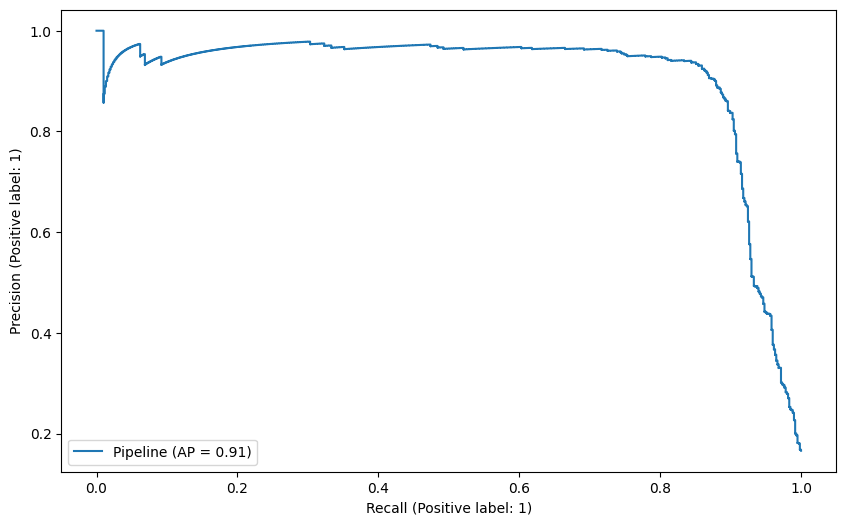

In [19]:
PrecisionRecallDisplay.from_estimator(svc_opt_model, X_test, y_test);


In [20]:
y_pred = svc_opt_model.predict(X_test)
y_pred_proba = svc_opt_model.predict_proba(X_test)
y_train_pred_proba = svc_opt_model.predict_proba(X_train)

svc_opt_f1 = f1_score(y_test, y_pred)
svc_opt_recall = recall_score(y_test, y_pred)
svc_opt_AP=average_precision_score(y_train, y_train_pred_proba[:,1])

#**XGBoost Model**

In [43]:
from xgboost import XGBClassifier


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

operations = [("OrdinalEncoder", column_trans),
              ("scaler", StandardScaler()),
              ("xgb", XGBClassifier(random_state=101))]


xgb_model = Pipeline(steps=operations)

xgb_model.fit(X_train, y_train)

c:\Users\Elif\Desktop\Streamlit_Employee_Churn\env_churn\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=101, ...))])

In [23]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)


Test_Set
[[2985   16]
 [  51  546]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3001
           1       0.97      0.91      0.94       597

    accuracy                           0.98      3598
   macro avg       0.98      0.95      0.97      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6997    2]
 [  17 1377]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6999
           1       1.00      0.99      0.99      1394

    accuracy                           1.00      8393
   macro avg       1.00      0.99      1.00      8393
weighted avg       1.00      1.00      1.00      8393



In [45]:
xgb_model = Pipeline(steps=operations)

scores = cross_validate(xgb_model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.982961
train_accuracy     0.997975
test_precision     0.975752
train_precision    0.998231
test_recall        0.920339
train_recall       0.989559
test_f1            0.947115
train_f1           0.993875
dtype: float64

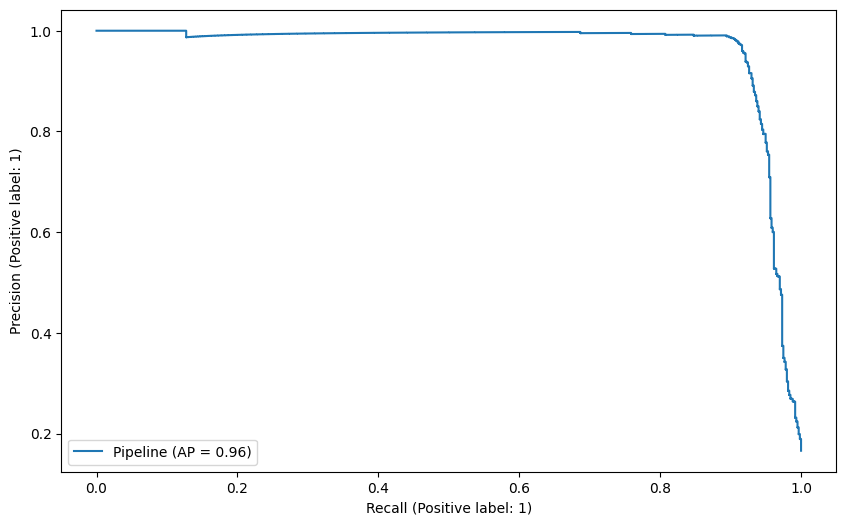

In [29]:
PrecisionRecallDisplay.from_estimator(xgb_model, X_test, y_test);


In [46]:
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)
y_train_pred_proba = xgb_model.predict_proba(X_train)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_AP=average_precision_score(y_train, y_train_pred_proba[:,1])

In [47]:
xgb_model = Pipeline(steps=operations)


param_grid = {
    "xgb__n_estimators": [50, 100, 200],
    "xgb__max_depth": [3, 4, 5],
    "xgb__learning_rate": [0.1, 0.2],
    "xgb__subsample": [0.5, 0.8, 1],
    "xgb__colsample_bytree": [0.5, 0.7, 1]
}

xgb_grid_model = GridSearchCV(estimator=xgb_model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",
                          n_jobs = -1,
                          return_train_score=True)

In [148]:
xgb_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Departments ', 'salary'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=No...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.5, 0.7, 1],
                         'xgb__learning_rate': [0.1, 0.2],
                         'xgb__max_depth': [3, 4, 5],
                         'xgb__n_estimators': [50, 100, 200],
                         'xgb__subsample': [0.5, 0.8, 1]},
             return_train_score=True, scoring='recall')

In [149]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Departments ', 'salary'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=101, ...))])

In [150]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[2980   21]
 [  44  553]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3001
           1       0.96      0.93      0.94       597

    accuracy                           0.98      3598
   macro avg       0.97      0.96      0.97      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6962   37]
 [ 100 1294]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6999
           1       0.97      0.93      0.95      1394

    accuracy                           0.98      8393
   macro avg       0.98      0.96      0.97      8393
weighted avg       0.98      0.98      0.98      8393



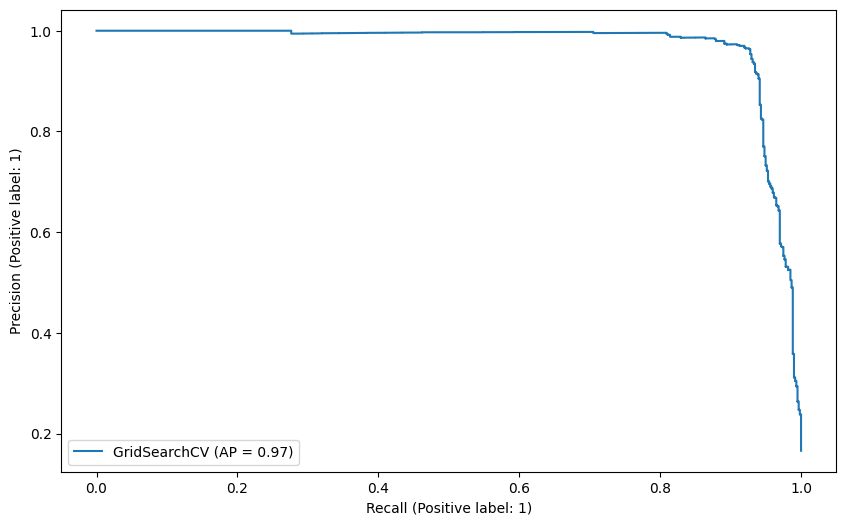

In [151]:
PrecisionRecallDisplay.from_estimator(xgb_grid_model, X_test, y_test);

In [152]:
y_pred = xgb_grid_model.predict(X_test)
y_pred_proba = xgb_grid_model.predict_proba(X_test)
y_train_pred_proba = xgb_grid_model.predict_proba(X_train)

xgb_grid_f1 = f1_score(y_test, y_pred)
xgb_grid_recall = recall_score(y_test, y_pred)
xgb_grid_AP=average_precision_score(y_train, y_train_pred_proba[:,1])

#**ANN Model**

In [37]:
SEED = 42
tf.keras.utils.set_random_seed(SEED)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    test_size=0.30,
    random_state=SEED
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    stratify=y_train,
    test_size=0.30,
    random_state=SEED )

In [50]:
operations = [("OrdinalEncoder", column_trans), ("scaler", StandardScaler())]


pipeline = Pipeline(steps=operations)


In [51]:
X_train= pipeline.fit_transform(X_train)
X_test= pipeline.transform(X_test)
X_val= pipeline.transform(X_val)

In [52]:
batch_size = 128

In [53]:
tf.random.set_seed(SEED)
model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [54]:
early_stop = EarlyStopping(
    monitor="val_loss",
    mode="min",
    verbose=1,
    patience=10,
    restore_best_weights=True)

In [55]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5996121657481118, 1: 3.009733606557377}

In [56]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=300,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights)

Epoch 1/300
46/46 [==============================] - 2s 11ms/step - loss: 0.6200 - recall: 0.8873 - val_loss: 0.6305 - val_recall: 0.8421
Epoch 2/300
46/46 [==============================] - 0s 5ms/step - loss: 0.4931 - recall: 0.8186 - val_loss: 0.4594 - val_recall: 0.8900
Epoch 3/300
46/46 [==============================] - 0s 4ms/step - loss: 0.3568 - recall: 0.8863 - val_loss: 0.3335 - val_recall: 0.9211
Epoch 4/300
46/46 [==============================] - 0s 5ms/step - loss: 0.2733 - recall: 0.9180 - val_loss: 0.2508 - val_recall: 0.9163
Epoch 5/300
46/46 [==============================] - 0s 5ms/step - loss: 0.2428 - recall: 0.9211 - val_loss: 0.2550 - val_recall: 0.9234
Epoch 6/300
46/46 [==============================] - 0s 4ms/step - loss: 0.2284 - recall: 0.9180 - val_loss: 0.2239 - val_recall: 0.9211
Epoch 7/300
46/46 [==============================] - 0s 4ms/step - loss: 0.2212 - recall: 0.9160 - val_loss: 0.2028 - val_recall: 0.9211
Epoch 8/300
46/46 [=====================

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                320       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 993 (3.88 KB)
Trainable params: 993 (3.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.619998,0.887295,0.630476,0.842105
1,0.493140,0.818648,0.459450,0.889952
2,0.356774,0.886270,0.333480,0.921053
3,0.273314,0.918033,0.250840,0.916268
4,0.242753,0.921107,0.255022,0.923445


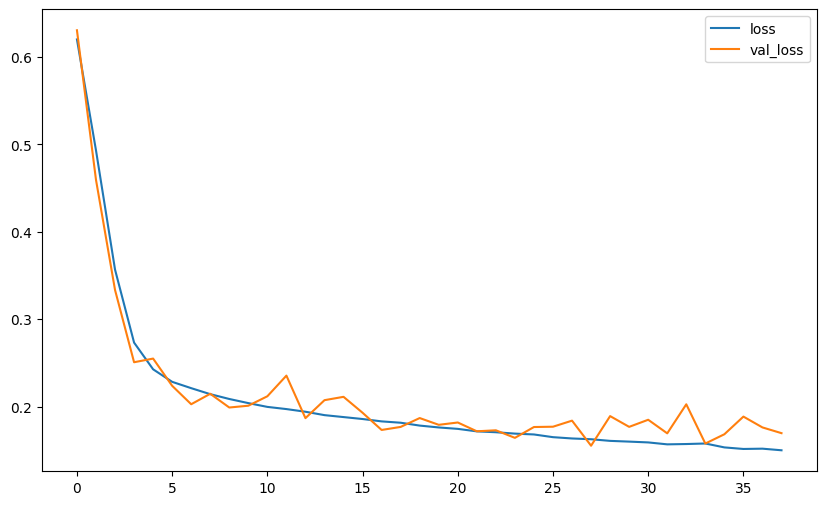

In [59]:
loss_df[["loss","val_loss"]].plot()
plt.show()

In [60]:
model.evaluate(X_test, y_test, verbose=0)

[0.1499175876379013, 0.9162479043006897]

In [61]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.1499175876379013
Recall:  0.9162479043006897


In [70]:
y_pred = model.predict(X_test, verbose=0)
y_pred

array([[1.1158367e-05],
       [1.2925255e-01],
       [1.6370416e-02],
       ...,
       [1.6212593e-01],
       [3.1798834e-01],
       [6.0891118e-02]], dtype=float32)

In [71]:
y_pred = model.predict(X_test, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2883  118]
 [  50  547]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3001
           1       0.82      0.92      0.87       597

    accuracy                           0.95      3598
   macro avg       0.90      0.94      0.92      3598
weighted avg       0.96      0.95      0.95      3598



113/113 [==============================] - 1s 5ms/step


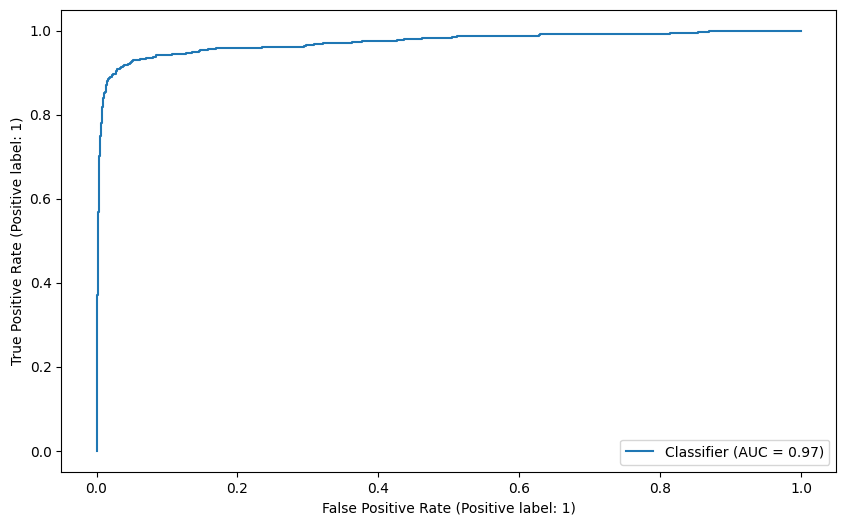

In [72]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [78]:
y_train_pred_proba = model.predict(X_train)
y_test_pred_proba = model.predict(X_test)

y_train_pred = (y_train_pred_proba > 0.5).astype("int32")
y_test_pred = (y_test_pred_proba > 0.5).astype("int32")

ANN_f1 = f1_score(y_test, y_test_pred)
ANN_recall = recall_score(y_test, y_test_pred)
ANN_AP = average_precision_score(y_train, y_train_pred_proba)


113/113 [==============================] - 0s 1ms/step


##With Dropout Layer and Learning rate

In [81]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam


In [82]:
tf.random.set_seed(SEED)
model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [83]:
early_stop = EarlyStopping(
    monitor="val_loss",
    mode="min",
    verbose=1,
    patience=10,
    restore_best_weights=True)

In [84]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5996121657481118, 1: 3.009733606557377}

In [85]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=300,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights)

Epoch 1/300
46/46 [==============================] - 3s 16ms/step - loss: 0.7948 - recall: 0.3945 - val_loss: 0.6425 - val_recall: 0.3493
Epoch 2/300
46/46 [==============================] - 0s 7ms/step - loss: 0.7139 - recall: 0.5666 - val_loss: 0.6610 - val_recall: 0.8756
Epoch 3/300
46/46 [==============================] - 0s 9ms/step - loss: 0.6910 - recall: 0.6291 - val_loss: 0.6547 - val_recall: 0.9067
Epoch 4/300
46/46 [==============================] - 0s 9ms/step - loss: 0.6764 - recall: 0.6865 - val_loss: 0.6532 - val_recall: 0.9234
Epoch 5/300
46/46 [==============================] - 0s 8ms/step - loss: 0.6611 - recall: 0.7305 - val_loss: 0.6423 - val_recall: 0.9354
Epoch 6/300
46/46 [==============================] - 0s 7ms/step - loss: 0.6453 - recall: 0.7551 - val_loss: 0.6115 - val_recall: 0.9306
Epoch 7/300
46/46 [==============================] - 0s 5ms/step - loss: 0.6329 - recall: 0.7367 - val_loss: 0.5769 - val_recall: 0.9330
Epoch 8/300
46/46 [=====================

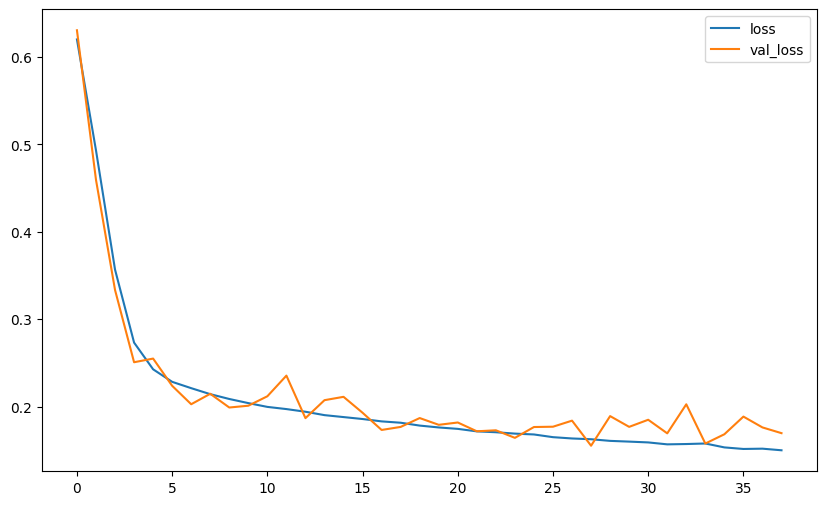

In [86]:
loss_df[["loss","val_loss"]].plot()
plt.show()

In [87]:
model.evaluate(X_test, y_test, verbose=0)

[0.17023016512393951, 0.9246231317520142]

In [88]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.17023016512393951
Recall:  0.9246231317520142


In [89]:
y_pred = model.predict(X_test, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2929   72]
 [  45  552]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3001
           1       0.88      0.92      0.90       597

    accuracy                           0.97      3598
   macro avg       0.93      0.95      0.94      3598
weighted avg       0.97      0.97      0.97      3598



##Optuna

In [90]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [91]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=10, restore_best_weights=True
)

In [92]:
tf.random.set_seed(SEED)
trial_metric = "Recall"

def create_model(trial):
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1.3e-1, log=True)

    # Create a Sequential model
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model  # Return the created model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_float("w0", 0.01, 5)
    w1 = trial.suggest_float("w1", 0.01, 5)

    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=200,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_val, y_val, verbose=0)[1]
    return score

In [94]:
study = optuna.create_study(direction="maximize")

study.optimize(objective, n_trials=10)

study.best_params

[I 2024-05-27 10:27:49,690] A new study created in memory with name: no-name-7bcb1a0f-b9af-47dc-94b5-c766bd4870a3


Restoring model weights from the end of the best epoch: 12.
Epoch 22: early stopping


[I 2024-05-27 10:27:59,882] Trial 0 finished with value: 0.9138755798339844 and parameters: {'n_units1': 110, 'n_units2': 55, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.007216314178537663, 'w0': 1.1542597581009948, 'w1': 1.311694957661103}. Best is trial 0 with value: 0.9138755798339844.


Restoring model weights from the end of the best epoch: 32.
Epoch 42: early stopping


[I 2024-05-27 10:28:11,046] Trial 1 finished with value: 0.8971291780471802 and parameters: {'n_units1': 117, 'n_units2': 125, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0012901514860667637, 'w0': 3.4794270369611344, 'w1': 2.784060405062701}. Best is trial 0 with value: 0.9138755798339844.


Restoring model weights from the end of the best epoch: 89.
Epoch 99: early stopping


[I 2024-05-27 10:28:32,559] Trial 2 finished with value: 0.9043062329292297 and parameters: {'n_units1': 13, 'n_units2': 42, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.001676742263786085, 'w0': 2.2561258771456965, 'w1': 1.3085559261264708}. Best is trial 0 with value: 0.9138755798339844.
[I 2024-05-27 10:29:15,643] Trial 3 finished with value: 0.9066985845565796 and parameters: {'n_units1': 103, 'n_units2': 35, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 3.278557327037001e-05, 'w0': 2.459550665376704, 'w1': 3.8793996873097174}. Best is trial 0 with value: 0.9138755798339844.


Restoring model weights from the end of the best epoch: 17.
Epoch 27: early stopping


[I 2024-05-27 10:29:28,101] Trial 4 finished with value: 0.9090909361839294 and parameters: {'n_units1': 127, 'n_units2': 74, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.001698557257137882, 'w0': 1.8469340283152165, 'w1': 4.82427199967578}. Best is trial 0 with value: 0.9138755798339844.


Restoring model weights from the end of the best epoch: 123.
Epoch 133: early stopping


[I 2024-05-27 10:30:11,238] Trial 5 finished with value: 0.9377990365028381 and parameters: {'n_units1': 54, 'n_units2': 70, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00012501710377375925, 'w0': 0.34376247350668104, 'w1': 2.726908046040032}. Best is trial 5 with value: 0.9377990365028381.


Restoring model weights from the end of the best epoch: 17.
Epoch 27: early stopping


[I 2024-05-27 10:30:22,325] Trial 6 finished with value: 0.9090909361839294 and parameters: {'n_units1': 58, 'n_units2': 22, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.06819367216562851, 'w0': 4.836001828135912, 'w1': 4.842768517625428}. Best is trial 5 with value: 0.9377990365028381.
[I 2024-05-27 10:31:05,928] Trial 7 finished with value: 0.19617225229740143 and parameters: {'n_units1': 86, 'n_units2': 70, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0006796842990717016, 'w0': 3.0531205792187692, 'w1': 4.516612535871741}. Best is trial 5 with value: 0.9377990365028381.


Restoring model weights from the end of the best epoch: 12.
Epoch 22: early stopping


[I 2024-05-27 10:31:12,508] Trial 8 finished with value: 0.8947368264198303 and parameters: {'n_units1': 125, 'n_units2': 116, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.02039241453278842, 'w0': 2.194902783722218, 'w1': 1.701048720294948}. Best is trial 5 with value: 0.9377990365028381.
[I 2024-05-27 10:32:35,939] Trial 9 finished with value: 0.8229665160179138 and parameters: {'n_units1': 111, 'n_units2': 128, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 1.4577391637929062e-05, 'w0': 3.9164867940626067, 'w1': 2.224345848720398}. Best is trial 5 with value: 0.9377990365028381.


{'n_units1': 54,
 'n_units2': 70,
 'optimizer': keras.src.optimizers.rmsprop.RMSprop,
 'learning_rate': 0.00012501710377375925,
 'w0': 0.34376247350668104,
 'w1': 2.726908046040032}

In [95]:
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=200,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/200
46/46 [==============================] - 1s 8ms/step - loss: 0.6039 - recall: 0.0400 - val_loss: 0.5597 - val_recall: 0.0000e+00
Epoch 2/200
46/46 [==============================] - 0s 5ms/step - loss: 0.5306 - recall: 0.0000e+00 - val_loss: 0.5016 - val_recall: 0.0000e+00
Epoch 3/200
46/46 [==============================] - 0s 4ms/step - loss: 0.4796 - recall: 0.0000e+00 - val_loss: 0.4598 - val_recall: 0.0000e+00
Epoch 4/200
46/46 [==============================] - 0s 4ms/step - loss: 0.4399 - recall: 0.0000e+00 - val_loss: 0.4247 - val_recall: 0.0000e+00
Epoch 5/200
46/46 [==============================] - 0s 4ms/step - loss: 0.4075 - recall: 0.0061 - val_loss: 0.3958 - val_recall: 0.0311
Epoch 6/200
46/46 [==============================] - 0s 4ms/step - loss: 0.3798 - recall: 0.0953 - val_loss: 0.3700 - val_recall: 0.1172
Epoch 7/200
46/46 [==============================] - 0s 6ms/step - loss: 0.3550 - recall: 0.1598 - val_loss: 0.3466 - val_recall: 0.1603
Epoch 8/200
4

In [96]:
history = model.history.history

<Axes: >

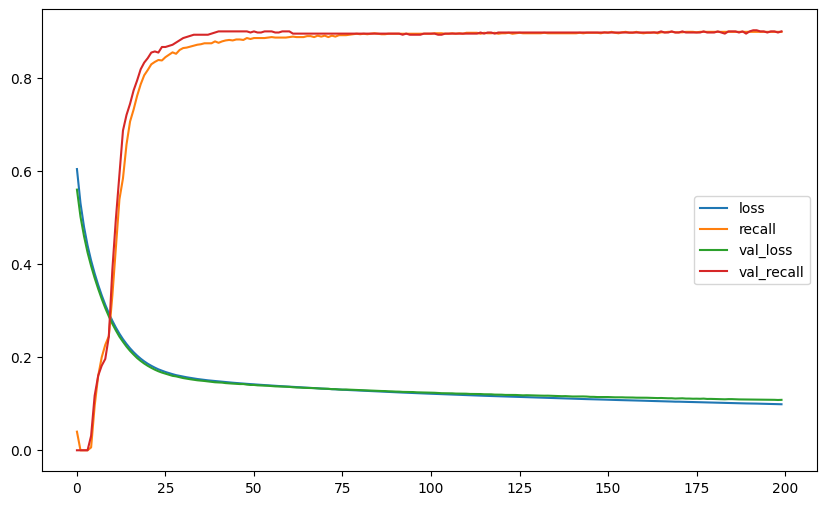

In [97]:
loss_df = pd.DataFrame(history)
loss_df.plot()

In [98]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

113/113 [==============================] - 0s 2ms/step
[[2949   52]
 [  58  539]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3001
           1       0.91      0.90      0.91       597

    accuracy                           0.97      3598
   macro avg       0.95      0.94      0.94      3598
weighted avg       0.97      0.97      0.97      3598



113/113 [==============================] - 0s 1ms/step


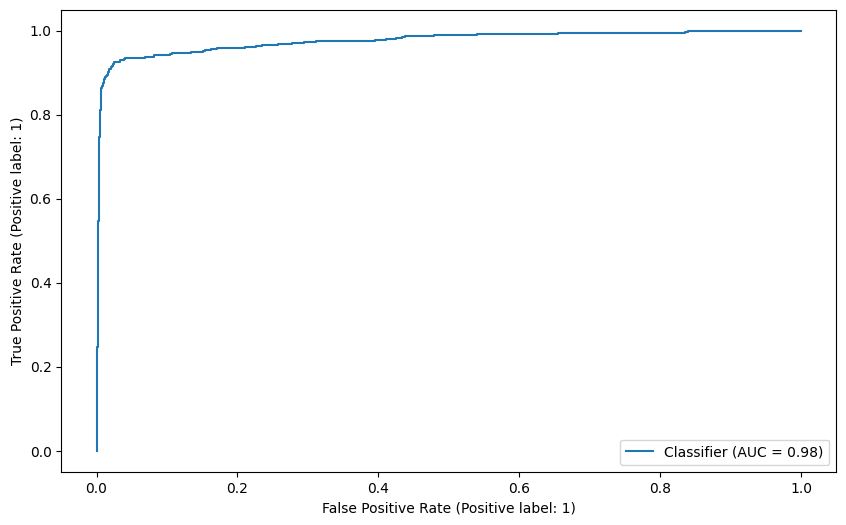

In [99]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [100]:
y_train_pred_proba = model.predict(X_train)
y_test_pred_proba = model.predict(X_test)

y_train_pred = (y_train_pred_proba > 0.5).astype("int32")
y_test_pred = (y_test_pred_proba > 0.5).astype("int32")

ANN_opt_f1 = f1_score(y_test, y_test_pred)
ANN_opt_recall = recall_score(y_test, y_test_pred)
ANN_opt_AP = average_precision_score(y_train, y_train_pred_proba)

113/113 [==============================] - 0s 3ms/step


#### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

In [154]:
compare = pd.DataFrame({"Model": ["log","log_grid", "knn", "knn_grid", "svc", "svc_opt", "rf","rf_grid", "xgb", "xgb_grid", "ANN", "ANN_opt"],
                        "recall_score": [log_recall, log_grid_recall, knn_recall,knn_grid_recall,svc_recall, svc_opt_recall, rf_recall, rf_grid_recall, xgb_recall, xgb_grid_recall, ANN_recall, ANN_opt_recall],
                        "f1_score": [log_f1, log_grid_f1, knn_f1,knn_grid_f1,svc_f1, svc_opt_f1, rf_f1, rf_grid_f1, xgb_f1, xgb_grid_f1, ANN_f1, ANN_opt_f1],
                        "AP_score": [log_AP, log_grid_AP, knn_AP,knn_grid_AP,svc_AP, svc_opt_AP, rf_AP, rf_grid_AP, xgb_AP, xgb_grid_AP, ANN_AP, ANN_opt_AP]})
compare

,Model,recall_score,f1_score,AP_score
0,log,0.824121,0.550952,0.362954
1,log_grid,0.827471,0.546460,0.364608
2,knn,0.899497,0.888337,0.971241
3,knn_grid,0.872697,0.899051,0.986982
4,svc,0.911223,0.860759,0.948469
5,svc_opt,0.907873,0.838360,0.928537
6,rf,0.911223,0.949389,1.000000
7,rf_grid,0.921273,0.840336,0.945151
8,xgb,0.926298,0.944492,0.977721
9,xgb_grid,0.926298,0.944492,0.977721


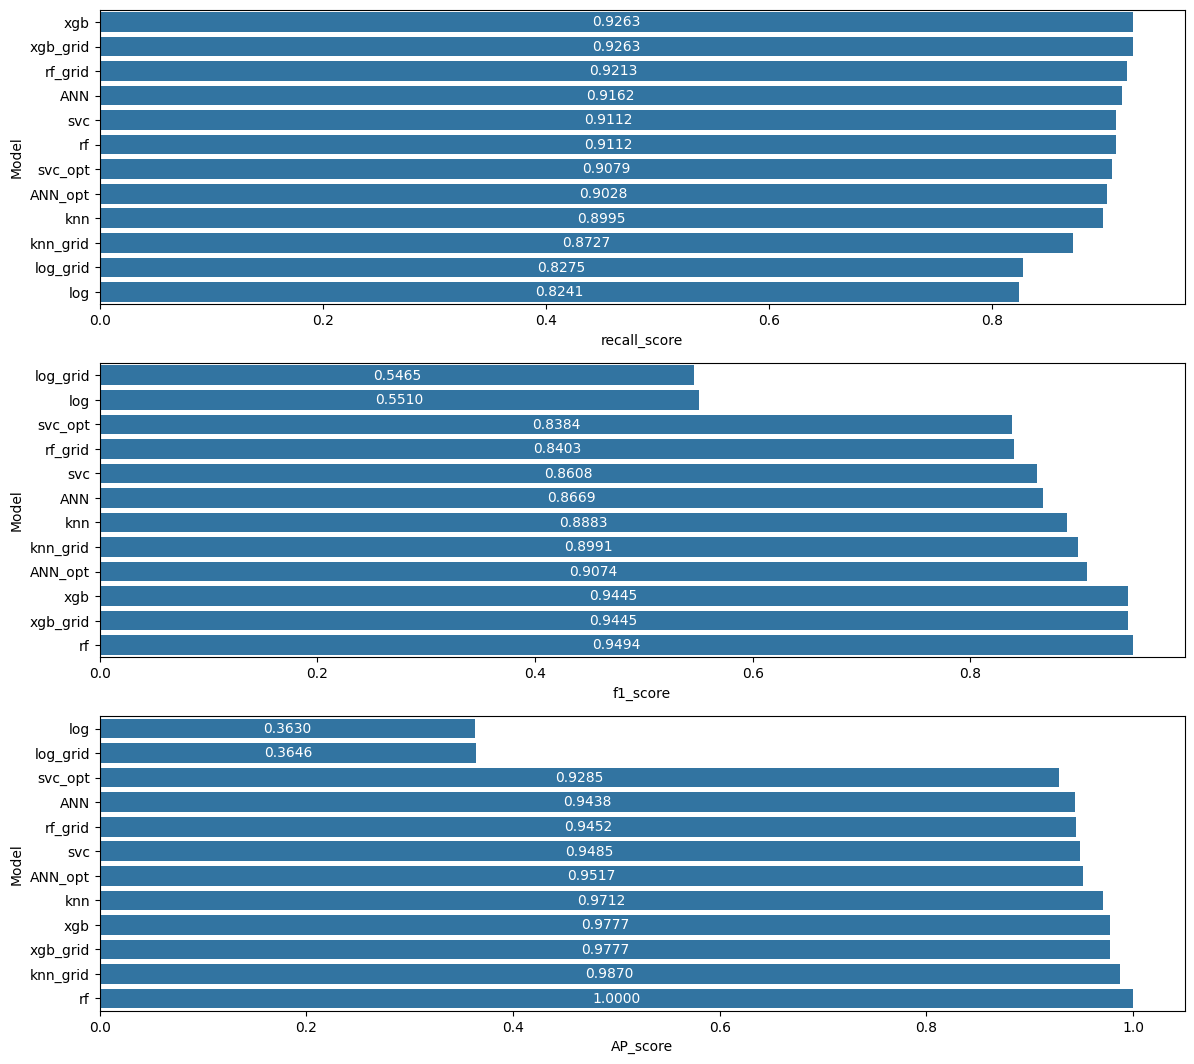

In [157]:
plt.figure(figsize=(14,13))

plt.subplot(311)
compare = compare.sort_values(by="recall_score", ascending=False)
ax=sns.barplot(x="recall_score", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(312)
compare = compare.sort_values(by="f1_score", ascending=True)
ax=sns.barplot(x="f1_score", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white")

plt.subplot(313)
compare = compare.sort_values(by="AP_score", ascending=True)
ax=sns.barplot(x="AP_score", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f", label_type="center", color="white");


####  Prediction

In [204]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [205]:
X = df.drop('left',axis=1)
y = df['left']

In [207]:
operations = [("OrdinalEncoder", column_trans),
              ("scaler", StandardScaler()),
              ("xgb", XGBClassifier(random_state=101))]


final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments', 'salary'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=101, ...))])

In [195]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.0,0.629658,0.241070,0.09,0.48,0.66,0.82,1.0
last_evaluation,11991.0,0.716683,0.168343,0.36,0.57,0.72,0.86,1.0
number_project,11991.0,3.802852,1.163238,2.00,3.00,4.00,5.00,7.0
average_montly_hours,11991.0,200.473522,48.727813,96.00,157.00,200.00,243.00,310.0
time_spend_company,11991.0,3.364857,1.330240,2.00,3.00,3.00,4.00,10.0
work_accident,11991.0,0.154282,0.361234,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,11991.0,0.016929,0.129012,0.00,0.00,0.00,0.00,1.0


In [212]:
new_obs={"satisfaction_level":[0.65],
           "last_evaluation": [0.68],
           "number_project":[5],
           'average_montly_hours':[220],
           'time_spend_company': [4],
           "work_accident":[0],
           "promotion_last_5years":[0],
            "departments": ['sales'],
            "salary": ['medium']}

In [213]:
samples = pd.DataFrame(new_obs)
samples

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary
0,0.65,0.68,5,220,4,0,0,sales,medium


In [214]:
prediction=final_model.predict(samples)

In [215]:
predictions_proba = final_model.predict_proba(samples)

In [217]:
samples["pred"] = prediction
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary,pred,pred_proba_1,pred_proba_0
0,0.65,0.68,5,220,4,0,0,sales,medium,0,0.006351,0.993649


In [227]:
sample2=pd.DataFrame(X.iloc[128]).T
sample2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary
128,0.09,0.82,6,250,4,0,0,support,low


In [229]:
prediction=final_model.predict(sample2)
predictions_proba = final_model.predict_proba(sample2)


In [230]:
sample2["pred"] = prediction
sample2["pred_proba_1"] = predictions_proba[:,1]
sample2["pred_proba_0"] = predictions_proba[:,0]
sample2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary,pred,pred_proba_1,pred_proba_0
128,0.09,0.82,6,250,4,0,0,support,low,1,0.998904,0.001096


In [232]:
df.iloc[128]['left']

1

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Best Model

In [41]:
import pickle

In [52]:
with open('best_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [53]:
with open('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [54]:
operations = [("OrdinalEncoder", column_trans),
              ("scaler", StandardScaler())]


pipeline = Pipeline(steps=operations)

In [55]:
import joblib
joblib.dump(pipeline, 'pipeline_model.pkl')

['pipeline_model.pkl']

In [56]:
pipeline = joblib.load('pipeline_model.pkl')


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___